# RMD PST data Analysis

Dan note to self, run the follow-ups for things like WW/WL/LL, then check the test_train lmer, then re-run the training models, writing out a CSV . . . 

In [1]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Data/'
path2analysis = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/'
path2figs = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/Figures/PST/'

In [2]:
%cd {path2code}

import csv, misc, os, random, re, SelfRep
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

%R suppressMessages(library('lmerTest'))
%R suppressMessages(library('lsmeans'))
%R lsm.options(disable.pbkrtest=TRUE)
%R suppressMessages(library('effsize'))
%R suppressMessages(library('afex'))
%R suppressMessages(library('QuantPsyc')) 
%R suppressMessages(library('vcd'))

/Users/danieldillon/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
:0: FutureWarning: IPython widgets are experimental and may change in the future.


/Users/danieldillon/Work/Expts/Code


array(['vcd', 'grid', 'QuantPsyc', 'MASS', 'boot', 'afex', 'reshape2',
       'effsize', 'lsmeans', 'estimability', 'lmerTest', 'lme4', 'Matrix',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='|S12')

In [3]:
def print_full(x):
    '''Print all rows of dataframe x'''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    return(x)

# Self Report

In [7]:
# Assemble self-report and demographics
pd.options.mode.chained_assignment = None

demo = SelfRep.demo_proc(path2data + 'RMD_SelfReport.xlsx')
cc = SelfRep.cc_proc(path2data + 'RMD_SelfReport.xlsx')
bb = SelfRep.bb_proc(path2data + 'RMD_SelfReport.xlsx')
bdi = SelfRep.bdi_proc(path2data + 'RMD_SelfReport.xlsx')
masq = SelfRep.masq_proc(path2data + 'RMD_SelfReport.xlsx')
aes = SelfRep.aes_proc(path2data + 'RMD_SelfReport.xlsx')
stai = SelfRep.stai_proc(path2data + 'RMD_SelfReport.xlsx')
shaps = SelfRep.shaps_proc(path2data + 'RMD_SelfReport.xlsx')
psqi = SelfRep.psqi_proc(path2data + 'RMD_SelfReport.xlsx')
tci = SelfRep.tci_proc(path2data + 'RMD_SelfReport.xlsx')
neo = SelfRep.neo_proc(path2data + 'RMD_SelfReport.xlsx')
poms = SelfRep.poms_proc(path2data + 'RMD_SelfReport.xlsx')
wtar = SelfRep.wtar_proc(path2data + 'RMD_SelfReport.xlsx')

sr = pd.merge(left=demo,right=bdi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=cc,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=bb,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=masq,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=aes,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=stai,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=shaps,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=psqi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=tci,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=neo,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=poms,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=wtar,left_on='subject',right_on='subject')

In [8]:
sr = sr[sr.Eligible != 0]

In [9]:
demo.head()

Item subject  Group  Age Gender Race Ethnicity Marital_Status  \
0     RMD001  Pilot   22      F    W        NH  Never Married   
1     RMD002  Pilot   22      F    W        NH  Never Married   
2     RMD003    MDD   43      F    W        NH      Separated   
3     RMD004     HC   37      M    W        NH  Never Married   
4     RMD005     HC   27      M    W         H  Never Married   

Item                  Education_Level  Education_Years          Occupation  \
0                   four year college               16              Intern   
1                   four year college               16  research assistant   
2                   technical college               12                chef   
3                   four year college               16          Accountant   
4     graduate or professional school               17             Student   

Item Highest Degree  Income Notes  Eligible  
0                BA    <10K   NaN         0  
1                BA  25-50K   NaN         0  
2               NaN     NaN   NaN         1  
3                BS  10-25k   NaN         1  
4                MA    <10K   NaN         1

In [10]:
print_full(sr)

Item subject Group  Age Gender     Race Ethnicity  \
2     RMD003   MDD   43      F        W        NH   
3     RMD004    HC   37      M        W        NH   
4     RMD005    HC   27      M        W         H   
5     RMD006    HC   43      M        W        NH   
6     RMD007    HC   20      F        W        NH   
7     RMD009    HC   46      M        W        NH   
8     RMD010    HC   55      F        W        NH   
9     RMD011    HC   24      F        W        NH   
10    RMD012    HC   37      F       Af        NH   
11    RMD013   MDD   46      M        W        NH   
12    RMD014    HC   29      M        A        NH   
13    RMD015    HC   22      F        A        NH   
14    RMD016    HC   25      M        W        NH   
15    RMD017    HC   38      M       Af        NH   
16    RMD018   MDD   38      M        W        NH   
17    RMD019    HC   27      M        W        NH   
18    RMD020   MDD   32      M        A        NH   
19    RMD021   MDD   29      F        W        NH   
21    RMD023   MDD   23      F        W        NH   
25    RMD027   MDD   27      M        W        NH   
26    RMD028    HC   27      M        W        NH   
27    RMD029    HC   26      F       Af        NH   
28    RMD030   MDD   19      F        W        NH   
29    RMD031    HC   26      M        W        NH   
30    RMD032    HC   54      F        W        NH   
31    RMD033    HC   27      M        W        NH   
32    RMD034    HC   20      F        W        NH   
33    RMD035    HC   25      F        W        NH   
34    RMD036   MDD   29      M        A        NH   
35    RMD037    HC   27      M        A        NH   
36    RMD038   MDD   19      M      A,W        NH   
37    RMD039    HC   22      F        A        NH   
38    RMD040    HC   27      M        W        NH   
39    RMD041   MDD   62      M        W        NH   
40    RMD042    HC   24      F        W         H   
41    RMD043   MDD   43      F        W        NH   
42    RMD044   MDD   34      M       Af        NH   
43    RMD045   MDD   23      F       Af        NH   
44    RMD046    HC   26      F       Af        NH   
45    RMD047   MDD   20      F        W         H   
46    RMD048    HC   22      F        W        NH   
47    RMD049    HC   30      M        W        NH   
48    RMD050    HC   25      F       Af        NH   
49    RMD051   MDD   24      F        W        NH   
51    RMD053    HC   39      M    Af, W         H   
52    RMD054    HC   22      F        W        NH   
53    RMD055    HC   27      F        W         H   
54    RMD056    HC   37      F        W        NH   
55    RMD057    HC   24      F        W        NH   
56    RMD058   MDD   22      F        W        NH   
57    RMD059   MDD   21      F        A        NH   
59    RMD061    HC   25      F  unknown         H   
61    RMD063    HC   25      M        W        NH   
62    RMD064    HC   24      F        W         H   
63    RMD065    HC   22      M        W        NH   
64    RMD066   MDD   21      F        W        NH   
65    RMD067    HC   28      F        W        NH   
66    RMD068   MDD   19      F       Af        NH   
67    RMD069    HC   36      M        W        NH   
68    RMD070    HC   40      F        W        NH   
69    RMD071   MDD   20      M        W        NH   
70    RMD072   MDD   33      F        W        NH   
71    RMD073    HC   37      M        W        NH   
72    RMD075   MDD   43      M        W         H   
73    RMD076   MDD   24      F        W        NH   
74    RMD077   MDD   64      F        W        NH   
75    RMD078   MDD   56      F        W        NH   
76    RMD079   MDD   21      F        W        NH   
77    RMD081   MDD   29      F        W         H   
78    RMD082   MDD   50      M        W       NaN   
79    RMD084   MDD   22      F        A        NH   
80    RMD085   MDD   32      F    Af, W         H   
81    RMD086   MDD   20      F       Af        NH   
82    RMD089   MDD   18      F        W        NH   
83    RMD090   MDD   30  

### *Demographics*

Group       
HC     count    41.000000
       mean     29.853659
       std       8.670528
       min      20.000000
       25%      24.000000
       50%      27.000000
       75%      37.000000
       max      55.000000
MDD    count    40.000000
       mean     30.000000
       std      12.140207
       min      18.000000
       25%      21.000000
       50%      26.000000
       75%      33.250000
       max      64.000000
dtype: float64
Between-group t-tests on Age
t(79) = -0.06, p = 0.950, g = -0.014


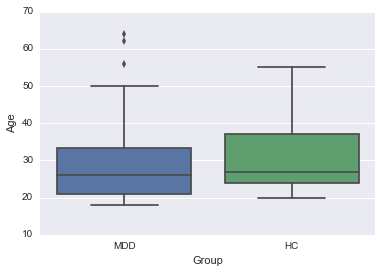

In [24]:
print sr.groupby('Group')['Age'].describe()

print 'Between-group t-tests on Age'
misc.ttest_2s(sr[sr.Group == 'HC']['Age'],sr[sr.Group == 'MDD']['Age'])

sns.set_style('darkgrid')
sns.boxplot(y='Age', x='Group', data = sr)

Group       
HC     count    41.000000
       mean     16.743902
       std       2.239202
       min      12.000000
       25%      16.000000
       50%      16.000000
       75%      18.000000
       max      22.000000
MDD    count    40.000000
       mean     15.937500
       std       2.810665
       min      12.000000
       25%      14.000000
       50%      16.000000
       75%      16.250000
       max      25.000000
dtype: float64
Between-group t-tests on Education
t(79) = 1.43, p = 0.157, g = 0.318


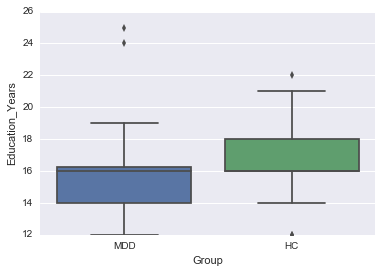

In [25]:
print (sr.groupby('Group')['Education_Years'].describe())

print ('Between-group t-tests on Education')
misc.ttest_2s(sr[sr.Group == 'HC']['Education_Years'],sr[sr.Group == 'MDD']['Education_Years'])

sns.boxplot(y='Education_Years', x='Group', data = sr)

### *BDI*

Group       
HC     count    41.000000
       mean      1.365854
       std       2.405786
       min       0.000000
       25%       0.000000
       50%       0.000000
       75%       2.000000
       max      12.000000
MDD    count    40.000000
       mean     28.350000
       std       8.036934
       min      16.000000
       25%      22.000000
       50%      28.500000
       75%      35.000000
       max      47.000000
dtype: float64
Between-group t-tests on BDI
t(79) = -20.58, p = 0.000, g = -4.573


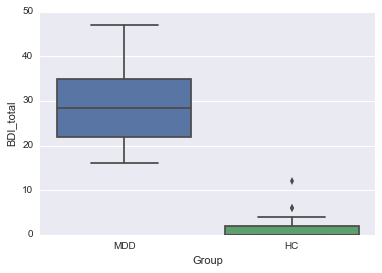

In [26]:
print (sr.groupby('Group')['BDI_total'].describe())

print ('Between-group t-tests on BDI')
misc.ttest_2s(sr[sr.Group == 'HC']['BDI_total'],sr[sr.Group == 'MDD']['BDI_total'])

sns.boxplot(y='BDI_total', x='Group', data = sr)

### *BIS-BAS*

Between-group t-tests on BIS
t(79) = -6.30, p = 0.000, g = -1.400
Between-group t-tests on BAS_D
t(79) = 3.43, p = 0.001, g = 0.762
Between-group t-tests on BAS_FS
t(79) = 4.15, p = 0.000, g = 0.922
Between-group t-tests on BAS_RR
t(79) = 1.83, p = 0.072, g = 0.406


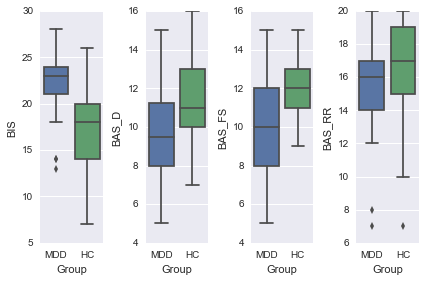

In [27]:
print ('Between-group t-tests on BIS')
misc.ttest_2s(sr[sr.Group == 'HC']['BIS'],sr[sr.Group == 'MDD']['BIS'])
print ('Between-group t-tests on BAS_D')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_D'],sr[sr.Group == 'MDD']['BAS_D'])
print ('Between-group t-tests on BAS_FS')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_FS'],sr[sr.Group == 'MDD']['BAS_FS'])
print ('Between-group t-tests on BAS_RR')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_RR'],sr[sr.Group == 'MDD']['BAS_RR'])


fig = plt.figure()
bis = fig.add_subplot(141)
sns.boxplot(y='BIS', x='Group', data = sr)
bis = fig.add_subplot(142)
sns.boxplot(y='BAS_D', x='Group', data = sr)
bas_fs = fig.add_subplot(143)
sns.boxplot(y='BAS_FS', x='Group', data = sr)
bas_rr = fig.add_subplot(144)
sns.boxplot(y='BAS_RR', x='Group', data = sr)
fig.tight_layout()

### *MASQ*

Between-group t-tests on MASQ_GDA
t(79) = -9.34, p = 0.000, g = -2.077
Between-group t-tests on MASQ_AA
t(79) = -5.46, p = 0.000, g = -1.215
Between-group t-tests on MASQ_GDD
t(79) = -16.12, p = 0.000, g = -3.582
Between-group t-tests on MASQ_AD
t(79) = -18.31, p = 0.000, g = -4.069


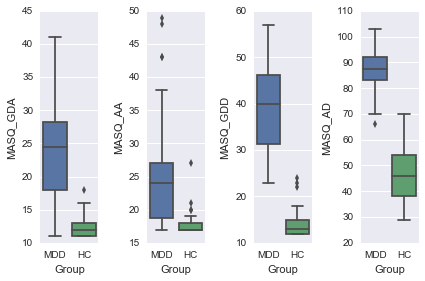

In [28]:
print ('Between-group t-tests on MASQ_GDA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDA'],sr[sr.Group == 'MDD']['MASQ_GDA'])
print ('Between-group t-tests on MASQ_AA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AA'],sr[sr.Group == 'MDD']['MASQ_AA'])
print ('Between-group t-tests on MASQ_GDD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDD'],sr[sr.Group == 'MDD']['MASQ_GDD'])
print ('Between-group t-tests on MASQ_AD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AD'],sr[sr.Group == 'MDD']['MASQ_AD'])

fig = plt.figure()
gda = fig.add_subplot(141)
sns.boxplot(y='MASQ_GDA', x='Group', data = sr)
aa = fig.add_subplot(142)
sns.boxplot(y='MASQ_AA', x='Group', data = sr)
gdd = fig.add_subplot(143)
sns.boxplot(y='MASQ_GDD', x='Group', data = sr)
ad = fig.add_subplot(144)
sns.boxplot(y='MASQ_AD', x='Group', data = sr)
fig.tight_layout()

### *AES*

Between-group t-tests on AES
t(79) = -16.41, p = 0.000, g = -3.647


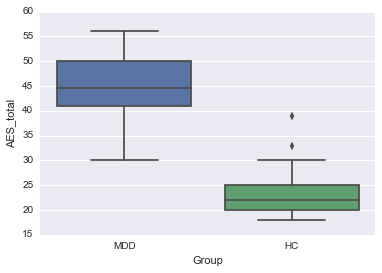

In [29]:
print ('Between-group t-tests on AES')
misc.ttest_2s(sr[sr.Group == 'HC']['AES_total'],sr[sr.Group == 'MDD']['AES_total'])

sns.boxplot(y='AES_total', x='Group', data = sr)

### *STAI*

Between-group t-tests on STAI trait
t(79) = -11.95, p = 0.000, g = -2.655
Between-group t-tests on STAI state
t(79) = -18.61, p = 0.000, g = -4.135


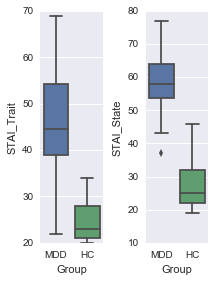

In [30]:
print ('Between-group t-tests on STAI trait')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_Trait'],sr[sr.Group == 'MDD']['STAI_Trait'])
print ('Between-group t-tests on STAI state')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_State'],sr[sr.Group == 'MDD']['STAI_State'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='STAI_Trait', x='Group', data = sr)
state = fig.add_subplot(142)
sns.boxplot(y='STAI_State', x='Group', data = sr)
fig.tight_layout()

### *SHAPS*

Between-group t-tests on SHAPS
t(79) = -9.81, p = 0.000, g = -2.181


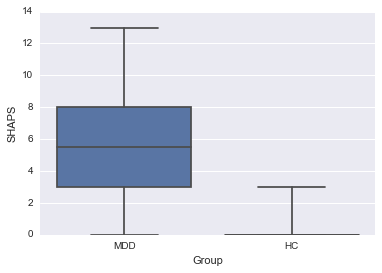

In [31]:
print ('Between-group t-tests on SHAPS')
misc.ttest_2s(sr[sr.Group == 'HC']['SHAPS'],sr[sr.Group == 'MDD']['SHAPS'])

sns.boxplot(y='SHAPS', x='Group', data = sr)

### *PSQI*

Between-group t-tests on PSQI duration
t(79) = -2.01, p = 0.048, g = -0.446
Between-group t-tests on PSQI Distubance
t(79) = -2.35, p = 0.021, g = -0.523
Between-group t-tests on PSQI Latency
t(78) = -2.88, p = 0.005, g = -0.644
Between-group t-tests on PSQI Daytime Disturbance
t(79) = -13.74, p = 0.000, g = -3.054
Between-group t-tests on PSQI Efficiency
t(79) = -2.63, p = 0.010, g = -0.585
Between-group t-tests on PSQI Quality
t(78) = -3.83, p = 0.000, g = -0.858
Between-group t-tests on PSQI Medication
t(79) = -0.72, p = 0.474, g = -0.160
Between-group t-tests on PSQI Total
t(77) = -6.66, p = 0.000, g = -1.497


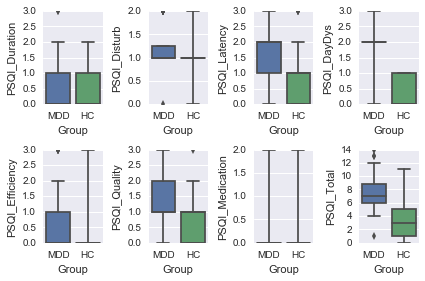

In [32]:
# Check on nan t-tests (prob have missing values)

print ('Between-group t-tests on PSQI duration')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Duration'],sr[sr.Group == 'MDD']['PSQI_Duration'])
print ('Between-group t-tests on PSQI Distubance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Disturb'],sr[sr.Group == 'MDD']['PSQI_Disturb'])
print ('Between-group t-tests on PSQI Latency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Latency'],sr[sr.Group == 'MDD']['PSQI_Latency'])
print ('Between-group t-tests on PSQI Daytime Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_DayDys'],sr[sr.Group == 'MDD']['PSQI_DayDys'])
print ('Between-group t-tests on PSQI Efficiency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Efficiency'],sr[sr.Group == 'MDD']['PSQI_Efficiency'])
print ('Between-group t-tests on PSQI Quality')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Quality'],sr[sr.Group == 'MDD']['PSQI_Quality'])
print ('Between-group t-tests on PSQI Medication')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Medication'],sr[sr.Group == 'MDD']['PSQI_Medication'])
print ('Between-group t-tests on PSQI Total')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Total'],sr[sr.Group == 'MDD']['PSQI_Total'])
fig = plt.figure()
dur = fig.add_subplot(241)
sns.boxplot(y='PSQI_Duration', x='Group', data = sr)
dist = fig.add_subplot(242)
sns.boxplot(y='PSQI_Disturb', x='Group', data = sr)
lat = fig.add_subplot(243)
sns.boxplot(y='PSQI_Latency', x='Group', data = sr)
day = fig.add_subplot(244)
sns.boxplot(y='PSQI_DayDys', x='Group', data = sr)
eff = fig.add_subplot(245)
sns.boxplot(y='PSQI_Efficiency', x='Group', data = sr)
qual = fig.add_subplot(246)
sns.boxplot(y='PSQI_Quality', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='PSQI_Medication', x='Group', data = sr)
tot = fig.add_subplot(248)
sns.boxplot(y='PSQI_Total', x='Group', data = sr) 
fig.tight_layout()

### *TCI*

In [33]:
sr.subject.nunique()

81

In [34]:
#RMD060 and RMD062 == invalid
sr.TCI_Valid.value_counts()

valid    81
Name: TCI_Valid, dtype: int64

In [35]:
print ('Between-group t-tests on Novelty Seeking')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_NovSeek'],sr[sr.Group == 'MDD']['TCI_NovSeek'])
print ('Between-group t-tests on Harm avoidance')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_HA'],sr[sr.Group == 'MDD']['TCI_HA'])
print ('Between-group t-tests on Reward dependence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_RewDep'],sr[sr.Group == 'MDD']['TCI_RewDep'])
print ('Between-group t-tests on Persistence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_Persist'],sr[sr.Group == 'MDD']['TCI_Persist'])
print ('Between-group t-tests on Self-Directedness ')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfDir'],sr[sr.Group == 'MDD']['TCI_SelfDir'])
print ('Between-group t-tests on Cooperativeness')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_CoOp'],sr[sr.Group == 'MDD']['TCI_CoOp'])
print ('Between-group t-tests on Self Transcendence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfTrans'],sr[sr.Group == 'MDD']['TCI_SelfTrans'])

fig = plt.figure()
nov = fig.add_subplot(241)
sns.boxplot(y='TCI_NovSeek', x='Group', data = sr)
ha = fig.add_subplot(242)
sns.boxplot(y='TCI_HA', x='Group', data = sr)
rewd = fig.add_subplot(243)
sns.boxplot(y='TCI_RewDep', x='Group', data = sr)
per = fig.add_subplot(244)
sns.boxplot(y='TCI_Persist', x='Group', data = sr)
self = fig.add_subplot(245)
sns.boxplot(y='TCI_SelfDir', x='Group', data = sr)
coop = fig.add_subplot(246)
sns.boxplot(y='TCI_CoOp', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='TCI_SelfTrans', x='Group', data = sr) 
fig.tight_layout()

Between-group t-tests on Novelty Seeking
t(79) = -1.10, p = 0.275, g = -0.244
Between-group t-tests on Harm avoidance
t(79) = -10.29, p = 0.000, g = -2.286
Between-group t-tests on Reward dependence
t(79) = 2.81, p = 0.006, g = 0.623
Between-group t-tests on Persistence
t(79) = 8.21, p = 0.000, g = 1.824
Between-group t-tests on Self-Directedness 
t(79) = 11.71, p = 0.000, g = 2.602
Between-group t-tests on Cooperativeness
t(79) = 3.27, p = 0.002, g = 0.727
Between-group t-tests on Self Transcendence
t(79) = 1.42, p = 0.160, g = 0.315


### *NEO*

In [37]:
print ('Between-group t-tests on Neuroticism')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_N'],sr[sr.Group == 'MDD']['NEO_N'])
print ('Between-group t-tests on Extraversion')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_E'],sr[sr.Group == 'MDD']['NEO_E'])
print ('Between-group t-tests on Openness to Experience')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_O'],sr[sr.Group == 'MDD']['NEO_O'])
print ('Between-group t-tests on Agreeableness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_A'],sr[sr.Group == 'MDD']['NEO_A'])
print ('Between-group t-tests on Conscientiousness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_C'],sr[sr.Group == 'MDD']['NEO_C'])

fig = plt.figure()
neur = fig.add_subplot(231)
sns.boxplot(y='NEO_N', x='Group', data = sr)
ext = fig.add_subplot(232)
sns.boxplot(y='NEO_E', x='Group', data = sr)
ope = fig.add_subplot(233)
sns.boxplot(y='NEO_O', x='Group', data = sr)
agr = fig.add_subplot(234)
sns.boxplot(y='NEO_A', x='Group', data = sr)
con = fig.add_subplot(235)
sns.boxplot(y='NEO_C', x='Group', data = sr)
fig.tight_layout()

Between-group t-tests on Neuroticism
t(79) = -16.96, p = 0.000, g = -3.769
Between-group t-tests on Extraversion
t(79) = 10.30, p = 0.000, g = 2.290
Between-group t-tests on Openness to Experience
t(79) = 0.72, p = 0.471, g = 0.161
Between-group t-tests on Agreeableness
t(79) = 2.59, p = 0.012, g = 0.575
Between-group t-tests on Conscientiousness
t(79) = 8.19, p = 0.000, g = 1.821


### *POMS*

Between-group t-tests on Tension-Anxiety
t(79) = -10.45, p = 0.000, g = -2.321
Between-group t-tests on Depression
t(79) = -15.96, p = 0.000, g = -3.547
Between-group t-tests on Anger-Hostility
t(79) = -6.22, p = 0.000, g = -1.383
Between-group t-tests on Vigor-Activity
t(79) = 13.15, p = 0.000, g = 2.922
Between-group t-tests on Fatigue
t(79) = -14.93, p = 0.000, g = -3.319
Between-group t-tests on Confusion-Bewilderment
t(79) = -3.57, p = 0.001, g = -0.793
Between-group t-tests on Total Mood Disturbance
t(79) = -16.70, p = 0.000, g = -3.710


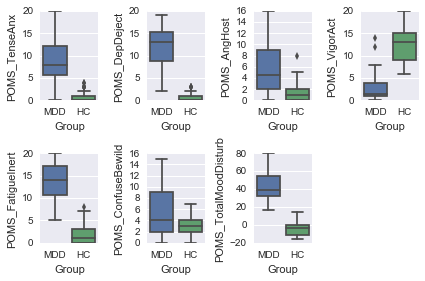

In [38]:
print ('Between-group t-tests on Tension-Anxiety')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TenseAnx'],sr[sr.Group == 'MDD']['POMS_TenseAnx'])
print ('Between-group t-tests on Depression')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_DepDeject'],sr[sr.Group == 'MDD']['POMS_DepDeject'])
print ('Between-group t-tests on Anger-Hostility')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_AngHost'],sr[sr.Group == 'MDD']['POMS_AngHost'])
print ('Between-group t-tests on Vigor-Activity')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_VigorAct'],sr[sr.Group == 'MDD']['POMS_VigorAct'])
print ('Between-group t-tests on Fatigue')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_FatigueInert'],sr[sr.Group == 'MDD']
              ['POMS_FatigueInert'])
print ('Between-group t-tests on Confusion-Bewilderment')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_ConfuseBewild'],sr[sr.Group == 'MDD']
              ['POMS_ConfuseBewild'])
print ('Between-group t-tests on Total Mood Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TotalMoodDisturb'],sr[sr.Group == 'MDD']
              ['POMS_TotalMoodDisturb'])

fig = plt.figure()
tax = fig.add_subplot(241)
sns.boxplot(y='POMS_TenseAnx', x='Group', data = sr)
dep = fig.add_subplot(242)
sns.boxplot(y='POMS_DepDeject', x='Group', data = sr)
ah = fig.add_subplot(243)
sns.boxplot(y='POMS_AngHost', x='Group', data = sr)
va = fig.add_subplot(244)
sns.boxplot(y='POMS_VigorAct', x='Group', data = sr)
fat = fig.add_subplot(245)
sns.boxplot(y='POMS_FatigueInert', x='Group', data = sr)
cb = fig.add_subplot(246)
sns.boxplot(y='POMS_ConfuseBewild', x='Group', data = sr)
tot = fig.add_subplot(247)
sns.boxplot(y='POMS_TotalMoodDisturb', x='Group', data = sr)
fig.tight_layout()

### *WTAR*

In [39]:
print ('Between-group t-tests on WTAR')
misc.ttest_2s(sr[sr.Group == 'HC']['WTAR_StdScore'],sr[sr.Group == 'MDD']['WTAR_StdScore'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='WTAR_StdScore', x='Group', data = sr)

Between-group t-tests on WTAR
t(79) = 0.02, p = 0.985, g = 0.004


# PST Train

In [40]:
# Assemble the PST training data

%cd {path2data}

train_dfs = []
train_d = re.compile('fMRI_train')

subjects = !ls -d RMD0*

for subject in subjects:
    file_list = [] # Some subjects have multiple training files, e.g. due to restart after scanner issue.
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            train_m = train_d.search(filename)
            if train_m:
                file_path = curr_path + filename
                file_list.append(file_path)

    newest_train_file = file_list[-1:][0] # Select the newest training file as it's most likely to be correct.
#     print newest_train_file
    train_df = pd.read_csv(newest_train_file)
    train_df['subject'] = subject
    train_dfs.append(train_df)
                
train_data = pd.concat(train_dfs)
train_data['lnRT'] = train_data.trial_RT.apply(np.log)
train_columns = ['subject','group','trial_num','block','trial_RT','lnRT','accuracy',
                 'left_stim','left_stim_number','right_stim','right_stim_number',
                 'object_onset','object_duration','response','response_onset','isi_onset',
                 'isi_duration','scheduled_outcome','feedback','feedback_onset',
                 'feedback_duration','iti_onset','iti_duration']

/Users/danieldillon/Work/Expts/REWMEM/Version4/Data


In [41]:
train_data['group'].replace(0, 'HC',inplace=True)
train_data['group'].replace(1, 'MDD',inplace=True)

train_data = train_data.reindex(columns=train_columns)

In [42]:
#Merging the PST train data with the self report data
train_full = pd.merge(left=train_data, right=sr, left_on='subject',right_on='subject')

In [43]:
def OutCheck(in_df):
    """Function to look for outliers, judged based on lnRT."""
    dfs = []
    for sub in in_df.subject.unique():
        outlier = []
        df = in_df[in_df.subject == sub]
        for i, row_i in df.iterrows():
            if row_i.trial_RT < 0.01: # Added to catch trials with too fast RTs (< 100 ms)
                outlier.append(1)
            elif np.isnan(row_i.lnRT):
                outlier.append(np.nan)
            elif abs(row_i.lnRT-df.lnRT.mean()) <= df.lnRT.std()*3:
                outlier.append(0)
            else:
                outlier.append(1)
        df['outlier'] = outlier
        dfs.append(df)
    out = pd.concat(dfs)
    return out

train = OutCheck(train_full)

In [44]:
# Not too many outliers . . . 
print 'Number of trials that are outliers for each subject:'
df1 = train[train['outlier'] == 1]
print (df1.groupby('subject')['outlier'].count())

Number of trials that are outliers for each subject:
subject
RMD003     1
RMD004     3
RMD005     3
RMD007    17
RMD009     1
RMD010     2
RMD011     1
RMD012     1
RMD013     7
RMD014     3
RMD016     1
RMD017    16
RMD018     1
RMD019    21
RMD020     8
RMD021    12
RMD027     1
RMD028    11
RMD031     2
RMD034     1
RMD035     1
RMD036     3
RMD037     3
RMD038     2
RMD041     1
RMD042     2
RMD043     1
RMD044     9
RMD045     1
RMD046     2
RMD047     1
RMD048     2
RMD049     1
RMD050     6
RMD051     5
RMD053     1
RMD054     1
RMD055    12
RMD057     1
RMD059     1
RMD061     6
RMD063     1
RMD064    20
RMD065     1
RMD066     1
RMD067     1
RMD069    11
RMD070     3
RMD071     2
RMD078     2
RMD079     1
RMD081    20
RMD082    11
RMD084     4
RMD085     2
RMD086     2
RMD089     3
RMD090     3
RMD092    18
RMD098     2
Name: outlier, dtype: int64


In [45]:
# Let's look at the number of no-response trials by subject . . . this only partially matches with the <90% below.
# RMD039 is not in that last, but RMD045 is and here he/she appears to have only 1 no-resp trial. Similar with RMD082,
# only 11 no-resp trials here but is on the list below. What explains the difference? 

# At least for RMD, the issue is that he/she completed more than the usual number of blocks, looks like the
# code had to be restarted. So let's tweak the initial generation of the train df so that it if more than one
# train CSV is available, it always uses the second one.

# Fixed, checking again . . . RMD045 and RMD082 are both still on list below, not here. Why?
# Checked the raw data: 

# RMD045 only completed 3 blocks and thus is missing 60 trials--with 1 no-resp and 179 trials
# with a response, that's 180 trials = 3 blocks x 60 trials per block. No explanation in Notes.

# RMD082 only completed 131 trials--got up to trial 11 of block 3, then stopped. Consistent with Notes, which 
# indicate that this subject was removed from scanner.

no_resp = train[train.trial_RT == 999]
no_resp['subject'].value_counts()

RMD039    77
RMD077    51
RMD068    50
RMD006    49
RMD015    39
RMD029    24
RMD091    22
RMD019    21
RMD081    20
RMD064    20
RMD092    18
RMD007    17
RMD017    16
RMD055    12
RMD021    12
RMD082    11
RMD028    11
RMD069    11
RMD044     9
RMD020     8
RMD013     7
RMD050     6
RMD061     6
RMD051     5
RMD037     3
RMD070     3
RMD089     3
RMD036     3
RMD084     3
RMD090     3
RMD004     3
RMD005     3
RMD098     2
RMD086     2
RMD048     2
RMD071     2
RMD010     2
RMD085     2
RMD038     2
RMD042     2
RMD078     2
RMD046     2
RMD035     1
RMD018     1
RMD034     1
RMD011     1
RMD016     1
RMD049     1
RMD079     1
RMD054     1
RMD053     1
RMD009     1
RMD065     1
RMD057     1
RMD043     1
RMD041     1
RMD066     1
RMD003     1
RMD045     1
RMD067     1
Name: subject, dtype: int64

In [46]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(train[train.trial_RT == 999])) 
train_clean = train[~((train.trial_RT == 999) | (train.outlier == 1))]

Number of trials with no response: 584


In [47]:
def make_pair(data):
    '''take left and right stimulus output pair'''
    d = {1:'AB', 2:'CD',3:'EF',4:'EF',5:'CD',6:'AB'}
    pair = d[data]
    return pair

train_clean['pair'] = train_clean.left_stim_number.apply(make_pair)

In [48]:
# Looks right . . . 
train_clean[['left_stim_number','right_stim_number','pair']].head()

left_stim_number  right_stim_number pair
0                 2                  5   CD
1                 3                  4   EF
2                 1                  6   AB
3                 1                  6   AB
4                 5                  2   CD

In [49]:
# Find out which participants responded <90% of the time, and put them in a list so we can easily exclude them for 
# all the upcoming analyses. Don't exclude RMD045, though, as he/she has only 3 blocks but data are clean.

asleep = []
g = train_clean.groupby(['subject', 'group']).trial_num.count()
df = g.to_frame()
df.reset_index(inplace=True)

for i, row_i in df.iterrows():
    if row_i.trial_num < 216 and row_i.subject != 'RMD045':
        print row_i.subject, row_i.group, row_i.trial_num
        asleep.append(row_i.subject)

RMD006 HC 191
RMD015 HC 201
RMD039 HC 139
RMD068 MDD 190
RMD077 MDD 189
RMD082 MDD 120


In [50]:
asleep

['RMD006', 'RMD015', 'RMD039', 'RMD068', 'RMD077', 'RMD082']

I think it makes sense to drop these subjects, with the exception of RMD045 who completed 3 blocks with only 1 non-response. We can run the analyses with and without them and report the data both ways, but for now I will drop.

In [51]:
train_clean = train_clean[~(train_clean.subject.isin(asleep))]
train_clean.reset_index(inplace=True)

### Train Reaction Time

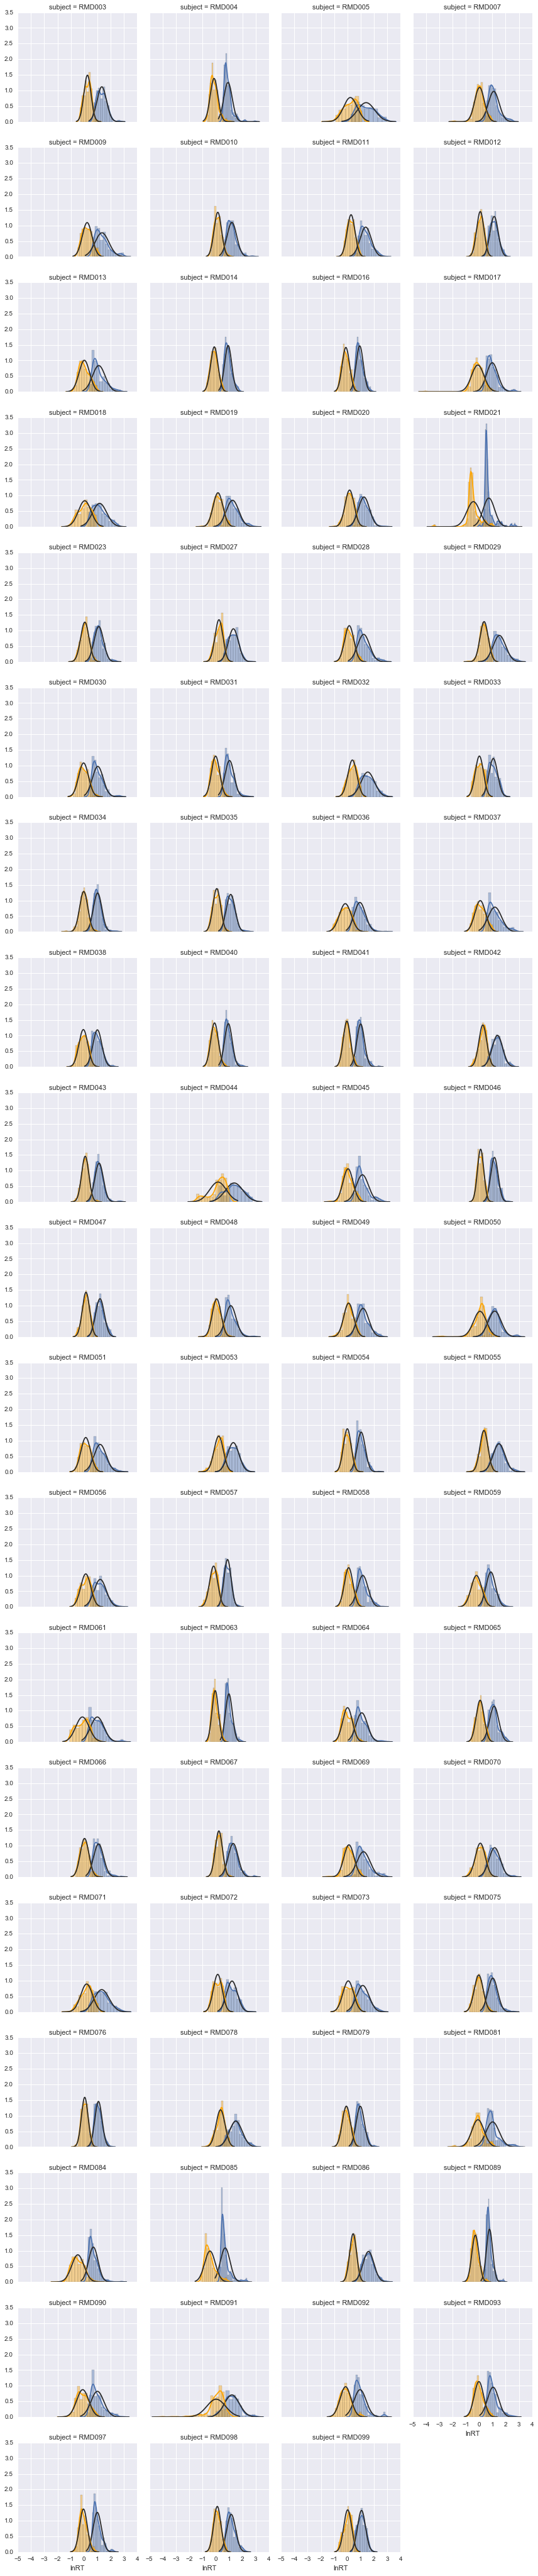

In [52]:
# Single subject data, raw and log transformed RT with normal distribution overlaid to detect deviations.
# lnRT is a definite improvement; note that some people have bimodal distributions (RMD048) and/or some very long
# RTs (RMD029)
g = sns.FacetGrid(data=train_clean,col='subject',col_wrap=4)
g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm)
g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [63]:
# Cleaning up a couple of variables, then pushing to R

train_clean.Education_Level = train_clean.Education_Level.astype(str)
train_clean.Occupation = train_clean.Occupation.astype(str)
train_clean['Highest Degree'] = train_clean['Highest Degree'].astype(str)
train_clean.Income = train_clean.Income.astype(str)
# del train_clean['Notes']

%Rpush train_clean
# %R str(train_clean) # Always run this to take a look at what you have. Notice that 'block' is not a factor--fix.
%R train_clean$block <- as.factor(train_clean$block)

%R train_rt.aov <- aov_ez(id='subject', dv='lnRT', data=train_clean, between='group', within=c('pair','block'),\
                         anova_table=list(correction='GG',es='pes'))
%R print(train_rt.aov) # Main effects of Group, Pair, and Block

Anova Table (Type 3 tests)

Response: lnRT
            Effect           df  MSE         F  pes p.value
1            group        1, 72 0.37    4.12 *  .05     .05
2             pair 1.98, 142.25 0.04    3.43 *  .05     .04
3       group:pair 1.98, 142.25 0.04      0.41 .006     .66
4            block 1.78, 128.41 0.08 35.10 ***  .33  <.0001
5      group:block 1.78, 128.41 0.08      0.33 .005     .70
6       pair:block 5.02, 361.41 0.01      1.01  .01     .41
7 group:pair:block 5.02, 361.41 0.01      0.85  .01     .51

Sphericity correction method: GG 


I know I suggested doing a block 4 - block 1 RT subtraction but it's unnecessary and just adds complexity, so I cut it.

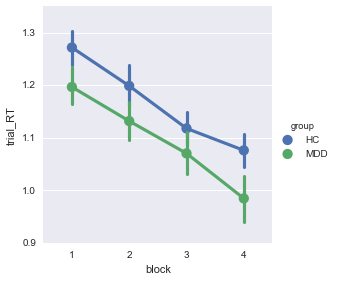

In [54]:
# Let's look at the RT over blocks. A few points here: (1) need to make sure you include "units = 'subject'" as that
# averages within subjects before plotting . . . if not done, you're taking all the hundreds or thousands of data
# points in each cell and averaging like you had 1 subject per group; (2) ci = 68 (adds standard error bars); (3) the
# default plot in factorplot is point plot, so I find it helpful to just call that and specify "kind = 'bar'"; and (4)
# the RT stats are run on lnRT b/c ANOVAs are designed for normally distributed data, but the plots and descriptives
# that go into a paper or talk use regular RT (trial_RT here) because that's more intuitive than ln.


# This shows both the Group and Block effects very clearly. Very surprising that the MDD's are faster!
# At least any HC > MDD effects will not be confounded by psychomotor slowing . . .

sns.set_style('darkgrid')
sns.factorplot(y='trial_RT', x='block', hue='group', hue_order=['HC','MDD'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Group_x_Block_RT.pdf')

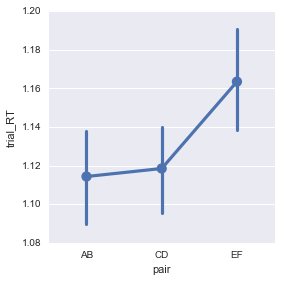

In [56]:
# Let's check out the Pair effect
sns.factorplot(y = 'trial_RT', x='pair', order=['AB','CD','EF'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Pair_RT.pdf')

In [57]:
# Okay, now we need to do some follow-ups to unpack those significant effects. Since Group only has two levels,
# no futher tests are needed--we can just look at the descriptives. Let's do that . . . MDDs are faster.

df = misc.MakeFrame(in_df=train_clean,id_vars=['group','subject'],dv='trial_RT',agg_func='mean')
df.head()

print df.groupby('group')['trial_RT'].mean()
print df.groupby('group')['trial_RT'].std()

group
HC     1.167200
MDD    1.096756
Name: trial_RT, dtype: float64
group
HC     0.172528
MDD    0.200505
Name: trial_RT, dtype: float64


In [59]:
# For the Block effect it's not so simple . . . we know there is an effect, but we don't know which specific 
# comparisons are significant (could be just Block 1 vs Block 4, or maybe it's Block 1 vs. 2 vs. 3 vs. 4, etc).
# The R package 'lsmeans' provides follow-up tests that control for the number of tests run, and it also 
# adjusts for the other factors in the model.

%R block_RT.lsm <- lsmeans(train_rt.aov, ~ block)
%R print(block_RT.lsm) # Shows the least square means, looks right
%R print(pairs(block_RT.lsm)) # Shows that all pairwise comparisons are significant, notice the Tukey HSD correction

 block       lsmean         SE     df    lower.CL    upper.CL
 X1     0.147732088 0.02382611 132.92  0.10060471  0.19485947
 X2     0.076983761 0.02382611 132.92  0.02985638  0.12411114
 X3     0.009841229 0.02382611 132.92 -0.03728615  0.05696861
 X4    -0.050854040 0.02386805 133.70 -0.09806186 -0.00364622

Results are averaged over the levels of: group, pair 
Confidence level used: 0.95 


 contrast   estimate         SE  df t.ratio p.value
 X1 - X2  0.07074833 0.02064871 218   3.426  0.0040
 X1 - X3  0.13789086 0.02064871 218   6.678  <.0001
 X1 - X4  0.19858613 0.02074536 218   9.573  <.0001
 X2 - X3  0.06714253 0.02064871 218   3.252  0.0072
 X2 - X4  0.12783780 0.02074536 218   6.162  <.0001
 X3 - X4  0.06069527 0.02074536 218   2.926  0.0197

Results are averaged over the levels of: group, pair 
P value adjustment: tukey method for comparing a family of 4 estimates 


In [60]:
# Same issue with the Pair effect: we know there's at least one significant effect in there, but we don't know which
# one (or more) it is . . .

%R pair_RT.lsm <- lsmeans(train_rt.aov, ~ pair)
%R print(pair_RT.lsm)
%R print(pairs(pair_RT.lsm)) # Only the most extreme difference--AB vs. EF--is significant (that's fine).

 pair     lsmean         SE     df     lower.CL  upper.CL
 AB   0.03093720 0.02239482 106.21 -0.013461686 0.0753361
 CD   0.03565561 0.02239482 106.21 -0.008743279 0.0800545
 EF   0.07118446 0.02239482 106.21  0.026785572 0.1155834

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast     estimate         SE  df t.ratio p.value
 AB - CD  -0.004718407 0.01679134 144  -0.281  0.9574
 AB - EF  -0.040247258 0.01679134 144  -2.397  0.0466
 CD - EF  -0.035528851 0.01679134 144  -2.116  0.0902

Results are averaged over the levels of: group, block 
P value adjustment: tukey method for comparing a family of 3 estimates 


### Train Accuracy

In [64]:
# Just changing a few things here and there b/c they are conventions . . . in R, fitted models are often given
# extensions that reflect the type (*aov, *lsm) or number (fm.1, fm.2) of procedure. In seaborn (and in regressions),
# variable 'y' is typically listed before variable 'x' because you're fitting the model to y . . . not a big deal but
# might as well get in the habit as others will expect it.

%R train_acc.aov <- aov_ez(id='subject', dv='accuracy', data=train_clean, between='group',within=c('pair','block'),\
                          anova_table=list(correction='GG',es='pes'))

%R print (train_acc.aov) # Strong effects of Pair and Block

Anova Table (Type 3 tests)

Response: accuracy
            Effect           df  MSE         F  pes p.value
1            group        1, 72 0.15      0.65 .009     .42
2             pair 1.59, 114.68 0.09 29.71 ***  .29  <.0001
3       group:pair 1.59, 114.68 0.09      0.56 .008     .53
4            block 2.67, 192.22 0.04  9.88 ***  .12  <.0001
5      group:block 2.67, 192.22 0.04      1.03  .01     .37
6       pair:block 5.19, 373.62 0.03      1.54  .02     .17
7 group:pair:block 5.19, 373.62 0.03      0.81  .01     .55

Sphericity correction method: GG 


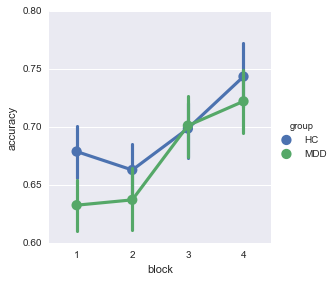

In [65]:
# Accuracy over blocks, separated by group . . . 
sns.factorplot(y="accuracy", x="block", hue="group", hue_order=['HC','MDD'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Group_x_Block_Acc.pdf')

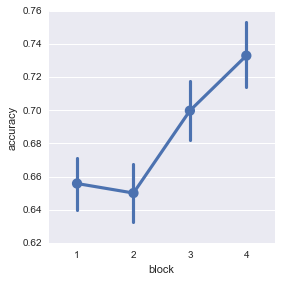

In [66]:
# Another plot of the Block effect, this time averaged over Group since Group didn't make a difference . . . 
# . . . looks like people experimented in block 2 and then stuck with what they learned.

sns.factorplot(y="accuracy", x="block", units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Block_ACC.pdf')

In [67]:
# Now let's look at the Pair effect . . . well that's a pretty clear result!

sns.factorplot(y="accuracy", x="pair", order=['AB','CD', 'EF'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Pair_ACC.pdf')

Once again I cut the block 4 - block 1 subtractions as unncessary . . . sorry for making you do extra work!

In [69]:
# Okay, now use lsmeans to decompose the Block effect.

%R block_acc.lsm <- lsmeans(train_acc.aov, ~ block)
%R print(block_acc.lsm) # Looks right . . . again, these means are adjusted for the other factors (pair, etc) in model
%R print(pairs(block_acc.lsm)) # Diffs are 1 vs. 4, 2 vs. 3, and 2 vs. 4. Not more b/c of Tukey HSD correction . . . 

 block    lsmean         SE     df  lower.CL  upper.CL
 X1    0.6560558 0.01689164 184.82 0.6227305 0.6893810
 X2    0.6500919 0.01689164 184.82 0.6167667 0.6834171
 X3    0.6996166 0.01689164 184.82 0.6662914 0.7329419
 X4    0.7312096 0.01693651 186.07 0.6977974 0.7646219

Results are averaged over the levels of: group, pair 
Confidence level used: 0.95 


 contrast     estimate         SE  df t.ratio p.value
 X1 - X2   0.005963873 0.01798586 218   0.332  0.9874
 X1 - X3  -0.043560842 0.01798586 218  -2.422  0.0760
 X1 - X4  -0.075153835 0.01807004 218  -4.159  0.0003
 X2 - X3  -0.049524715 0.01798586 218  -2.754  0.0322
 X2 - X4  -0.081117707 0.01807004 218  -4.489  0.0001
 X3 - X4  -0.031592993 0.01807004 218  -1.748  0.3014

Results are averaged over the levels of: group, pair 
P value adjustment: tukey method for comparing a family of 4 estimates 


In [70]:
# And now the Pair effect . . . every pair is different from every other pair. Good . . . 

%R pair_acc.lsm <- lsmeans(train_acc.aov, ~ pair)
%R print(pair_acc.lsm) # Looks right 
%R print(pairs(pair_acc.lsm))

 pair    lsmean         SE     df  lower.CL  upper.CL
 AB   0.7650707 0.01797395 190.16 0.7296167 0.8005246
 CD   0.6906944 0.01797395 190.16 0.6552405 0.7261484
 EF   0.5969653 0.01797395 190.16 0.5615114 0.6324193

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast   estimate        SE  df t.ratio p.value
 AB - CD  0.07437622 0.0218564 144   3.403  0.0025
 AB - EF  0.16810531 0.0218564 144   7.691  <.0001
 CD - EF  0.09372909 0.0218564 144   4.288  0.0001

Results are averaged over the levels of: group, block 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [71]:
# Let's take a look at how often people selected the various stimuli, so we can test out my 'AvoidB accuracy depends
# on how often you chose B during training' hypothesis . . . 

def CodeChoice(data):
    '''Use position of stimuli on screen and response to code choice.'''
    s = {1:'A', 2:'C', 3:'E', 4:'F', 5:'D', 6:'B'}
    
    left_stim, right_stim, response = data
    
    if pd.isnull(response):
        choice = np.nan
    elif response == 'left':
        choice = s[left_stim]
    elif response == 'right':
        choice = s[right_stim]
    
    return choice

train_clean['choice'] = train_clean[['left_stim_number','right_stim_number','response']].apply(CodeChoice,axis=1)
train_clean[['left_stim_number','right_stim_number','response','choice']].head()

left_stim_number  right_stim_number response choice
0                 2                  5    right      D
1                 3                  4    right      F
2                 1                  6     left      A
3                 1                  6    right      B
4                 5                  2     left      D

In [72]:
# Interesting pattern in the data below . . . HC > MDD for all the "good" stimuli, MDD > HC for all the "bad" stimuli.
# This is a remarkably clear graph, one of the best I've seen (ever, and certainly for the PST) . . . 

g = train_clean.groupby(['group','subject'])['choice'].value_counts()
df = g.to_frame()
df.reset_index(inplace=True)
new_cols = ['group','subject','stimulus','times_chosen']
df.columns = new_cols
# print df.head(13)
sns.factorplot(y='times_chosen',x='stimulus',x_order=['A','C','E','F','D','B'], hue='group',units='subject',
               kind='bar',ci=68,data=df)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Choices.pdf')

In [73]:
# I'll run a 2 Group x 2 Stimulus (A,B) ANOVA on choice . . . I am cherry picking here by selecting the most extreme
# stimuli. This was significant the first time I ran it, not now . . . hopefully will be with more subjects . . . 

choose_ab = df[(df.stimulus == 'A') | (df.stimulus == 'B')]

%Rpush choose_ab
%R choose_ab.aov <- aov_ez(id='subject', dv='times_chosen', within='stimulus', between='group', data=choose_ab)
%R print(choose_ab.aov)

Anova Table (Type 3 tests)

Response: times_chosen
          Effect    df    MSE          F    ges p.value
1          group 1, 73   4.83       0.02 <.0001     .89
2       stimulus 1, 73 234.39 275.07 ***    .79  <.0001
3 group:stimulus 1, 73 234.39       2.47    .03     .12

Sphericity correction method: GG 


In [74]:
# Run the follow-up tests . . . 
%R choose_ab.lsm <- lsmeans(choose_ab.aov, ~ stimulus * group)
%R print(choose_ab.lsm) # Looks right

# Okay to turn correction off here b/c only care about HC vs. MDD for A and B, and if
# the correction is not turned off we will adjust for 4 more tests we don't care about . . .
%R print(pairs(choose_ab.lsm,adjust='none')) # HC > MDD for choosing A was sig, now not. Clearly not super strong . . . 

 stimulus group   lsmean       SE    df lower.CL upper.CL
 A        HC    61.84244 1.774388 76.05 58.30848 65.37640
 B        HC    16.44770 1.774388 76.05 12.91374 19.98167
 A        MDD   57.86520 1.797722 75.97 54.28470 61.44570
 B        MDD   20.32466 1.797722 75.97 16.74416 23.90516

Confidence level used: 0.95 


 contrast        estimate       SE    df t.ratio p.value
 A,HC - B,HC    45.394737 3.512275 73.00  12.925  <.0001
 A,HC - A,MDD    3.977240 2.525919 76.01   1.575  0.1195
 A,HC - B,MDD   41.517781 2.525919 76.01  16.437  <.0001
 B,HC - A,MDD  -41.417496 2.525919 76.01 -16.397  <.0001
 B,HC - B,MDD   -3.876956 2.525919 76.01  -1.535  0.1290
 A,MDD - B,MDD  37.540541 3.559421 73.00  10.547  <.0001



group
HC     78.994492
MDD    73.877012
Name: accuracy, dtype: float64
group
HC     12.582822
MDD    14.682261
Name: accuracy, dtype: float64
t(73) = 1.62, p = 0.109, g = 0.375


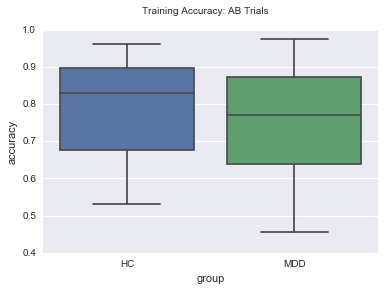

In [75]:
# If the above analysis is correct then it implies there should be a group difference in AB accuracy . . . 
# . . . and there was, but no longer; even if we get back to p < 0.05, it's clear this isn't a very strong result.

train_ab = train_clean[train_clean.pair == 'AB']
df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

print 100*(df.groupby('group')['accuracy'].mean())
print 100*(df.groupby('group')['accuracy'].std())

misc.ttest_2s(df[df.group == 'HC']['accuracy'],df[df.group == 'MDD']['accuracy'],paired=False)

sns.boxplot(y='accuracy',x='group',data=df)
sns.plt.suptitle('Training Accuracy: AB Trials')
sns.plt.savefig(path2figs + 'RMD_PST_Train_AB_ACC.pdf')

## PST Ratings

In [76]:
%cd {path2data}

rate_dfs = []
# rate_d = re.compile('fMRI_ratings')
rate_d = re.compile('_PST_fMRI_ratings') # Need to be careful here; line above grabs RevMem ratings too 

subjects = !ls -d RMD0*

for sub in subjects:
    
    # Copying in Python is tricky and best avoided--here's a cleaner way to get Group status
    group = train_full[train_full.subject == sub]['group'].unique()
    if group: # Some subjects (RMD001, RMD002) don't have a group so need to check for that before . . . 
        group = group[0] # . . . pulling the group name out of the list.
    else:
        group = 'none'
        
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            rate_m = rate_d.search(filename)
            if rate_m:
                file_path = curr_path + filename
                rate_df = pd.read_csv(file_path)
                rate_df['group'] = group
                rate_df['subject'] = sub
                rate_dfs.append(rate_df)
                
PST_rate = pd.concat(rate_dfs)
ratings_columns = ['subject','group','stimulus','prompt','rating']
PST_rate = PST_rate.reindex(columns=ratings_columns)
PST_rate = PST_rate[~(PST_rate.group == 'none')] # Drop the pilots
PST_rate = PST_rate[~(PST_rate.subject.isin(asleep))] # Drop the sleepy peeps

/Users/danieldillon/Work/Expts/REWMEM/Version4/Data


In [77]:
PST_rate.head()

subject group stimulus   prompt  rating
0  RMD003   MDD   reward  valence       9
1  RMD003   MDD     zero  valence       1
2  RMD003   MDD   reward  arousal       8
3  RMD003   MDD     zero  arousal       2
0  RMD004    HC   reward  valence       9

In [78]:
# We've got one less subject in the ratings than in the training. Who is it? RMD045--makes sense, quit early (quitter)
print train_clean.subject.nunique()
print PST_rate.subject.nunique()

for sub in train_clean.subject.unique():
    if sub not in PST_rate.subject.unique():
        print sub

75
74
RMD045


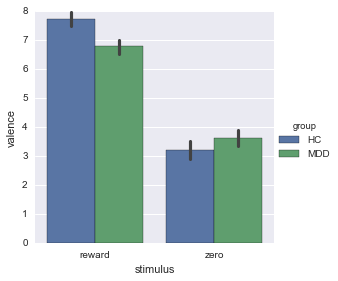

In [79]:
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=PST_rate[PST_rate.prompt == 'valence'])
sns.plt.ylabel('valence')
sns.plt.savefig(path2figs + 'PST_Valence.pdf')

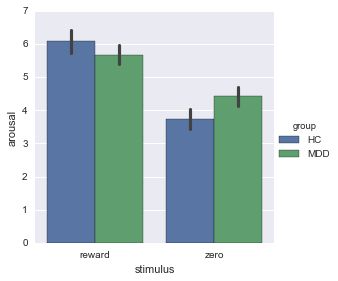

In [80]:
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=PST_rate[PST_rate.prompt == 'arousal'])
sns.plt.ylabel('arousal')
sns.plt.savefig(path2figs + 'PST_Arousal.pdf')

In [82]:
# Totally fine to select out valence and then push just that to R, but here's another way . . . 

%Rpush PST_rate
%R valence = subset(PST_rate, prompt == 'valence')
%R arousal = subset(PST_rate, prompt == 'arousal')

print 'valence . . .'
%R valence.aov <- aov_ez(id='subject', dv='rating', data=valence, between='group', within=c('stimulus'),\
                        anova_table=list(correction='GG',es='pes'))
%R print(valence.aov) # Only a main effect of Stim, but very nearly a Group x Stim (would be good)

print '\narousal . . .'
%R arousal.aov <- aov_ez(id='subject', dv='rating', data=arousal, between='group', within=c('stimulus'),\
                        anova_table=list(correction='GG',es='pes'))
%R print(arousal.aov) # Same here, main effect of Stim plus (almost) a Group x Stim interaction.

valence . . .


Anova Table (Type 3 tests)

Response: rating
          Effect    df  MSE          F pes p.value
1          group 1, 72 1.38       1.89 .03     .17
2       stimulus 1, 72 4.18 129.85 *** .64  <.0001
3 group:stimulus 1, 72 4.18     3.93 + .05     .05

Sphericity correction method: GG 



arousal . . .


Anova Table (Type 3 tests)

Response: rating
          Effect    df  MSE         F  pes p.value
1          group 1, 72 4.10      0.13 .002     .72
2       stimulus 1, 72 2.98 40.57 ***  .36  <.0001
3 group:stimulus 1, 72 2.98    3.88 +  .05     .05

Sphericity correction method: GG 


In [83]:
# Follow-ups on valence. Nice, group difference in valence for rewards, not zeros!

%R valence.lsm <- lsmeans(valence.aov, ~ group*stimulus)
%R print(valence.lsm)
%R print(pairs(valence.lsm),adjust='none')

 group stimulus   lsmean        SE     df lower.CL upper.CL
 HC    reward   7.714122 0.2715965 115.87 7.176185 8.252059
 MDD   reward   6.781373 0.2771699 114.01 6.232303 7.330444
 HC    zero     3.214122 0.2715965 115.87 2.676185 3.752059
 MDD   zero     3.614707 0.2771699 114.01 3.065636 4.163778

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.9327485 0.3880741 114.94   2.404  0.0178
 HC,reward - HC,zero     4.5000000 0.4692675  72.00   9.589  <.0001
 HC,reward - MDD,zero    4.0994152 0.3880741 114.94  10.563  <.0001
 MDD,reward - HC,zero    3.5672515 0.3880741 114.94   9.192  <.0001
 MDD,reward - MDD,zero   3.1666667 0.4821265  72.00   6.568  <.0001
 HC,zero - MDD,zero     -0.4005848 0.3880741 114.94  -1.032  0.3041



In [84]:
# Follow-ups on arousal. Neither follow-up is sig but can see that controls find rewards more arousing and zeros less
# arousing than the MDDs do . . . 

%R arousal.lsm <- lsmeans(arousal.aov, ~ group*stimulus)
%R print(arousal.lsm)
%R print(pairs(arousal.lsm),adjust='none')

 group stimulus   lsmean        SE     df lower.CL upper.CL
 HC    reward   6.103633 0.3076089 139.94 5.495472 6.711795
 MDD   reward   5.665037 0.3111334 141.08 5.049950 6.280123
 HC    zero     3.735212 0.3076089 139.94 3.127051 4.343374
 MDD   zero     4.415037 0.3111334 141.08 3.799950 5.030123

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.4385965 0.4375702 140.53   1.002  0.3179
 HC,reward - HC,zero     2.3684211 0.3962508  72.00   5.977  <.0001
 HC,reward - MDD,zero    1.6885965 0.4375702 140.53   3.859  0.0002
 MDD,reward - HC,zero    1.9298246 0.4375702 140.53   4.410  <.0001
 MDD,reward - MDD,zero   1.2500000 0.4071089  72.00   3.070  0.0030
 HC,zero - MDD,zero     -0.6798246 0.4375702 140.53  -1.554  0.1225



Overall, the ratings data also look good--especially the group difference in valence ratings for rewards. This is a spot where the stats should definitely benefit from the addition of more subjects. 

In [85]:
# Let's see if there's any relationship between AB accuracy during training and reward-zero difference scores for
# valence and/or arousal . . . create those difference scores in the next two cells . . . 

df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

group subject  accuracy
0    HC  RMD004  0.935897
1    HC  RMD005  0.531646
2    HC  RMD007  0.739726
3    HC  RMD009  0.925000
4    HC  RMD010  0.787500

In [86]:
valence = PST_rate[PST_rate.prompt == 'valence']
valence = valence.pivot(index='subject',columns='stimulus',values='rating')
valence.reset_index(inplace=True)
valence['valence_Rew_vs_Zero'] = valence['reward'] - valence['zero']
valence.head()

stimulus subject  reward  zero  valence_Rew_vs_Zero
0         RMD003       9     1                    8
1         RMD004       9     1                    8
2         RMD005       9     1                    8
3         RMD007       6     5                    1
4         RMD009       3     7                   -4

In [87]:
arousal = PST_rate[PST_rate.prompt == 'arousal']
arousal = arousal.pivot(index='subject',columns='stimulus',values='rating')
arousal.reset_index(inplace=True)
arousal['arousal_Rew_vs_Zero'] = arousal['reward'] - arousal['zero']
arousal.head()

stimulus subject  reward  zero  arousal_Rew_vs_Zero
0         RMD003       8     2                    6
1         RMD004       7     4                    3
2         RMD005       2     2                    0
3         RMD007       4     3                    1
4         RMD009       6     5                    1

In [88]:
# Now merge everything for the correlations . . . 
train_rate = pd.merge(valence,arousal,on='subject')
train_rate = train_rate[['subject','valence_Rew_vs_Zero','arousal_Rew_vs_Zero']]

train_corr = pd.merge(df,train_rate,on='subject')
train_corr.head()

group subject  accuracy  valence_Rew_vs_Zero  arousal_Rew_vs_Zero
0    HC  RMD004  0.935897                    8                    3
1    HC  RMD005  0.531646                    8                    0
2    HC  RMD007  0.739726                    1                    1
3    HC  RMD009  0.925000                   -4                    1
4    HC  RMD010  0.787500                    6                    3

In [89]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='valence_Rew_vs_Zero',hue='group', data=train_corr)

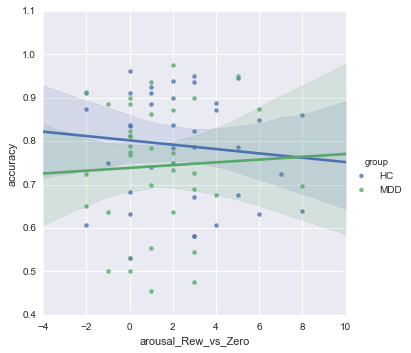

In [90]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='arousal_Rew_vs_Zero',hue='group',data=train_corr)

# PST Test

In [176]:
'''Assemble the PST test data'''

%cd {path2data}

test_dfs = []
test_d = re.compile('PST_test')

subjects = !ls -d RMD0*

for sub in subjects:
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            test_m = test_d.search(filename)
            if test_m:
                file_path = curr_path + filename
#                 print file_path
                test_df = pd.read_csv(file_path)
                test_df['subject'] = sub
                test_dfs.append(test_df)
                
test_data = pd.concat(test_dfs)
test_data['lnRT'] = test_data.trial_RT.apply(np.log)
test_columns = ['subject','group','block_id','trial_id','trial_RT','lnRT','trial_accuracy',
                'left_stim_name','left_stim_number','right_stim_name','right_stim_number',
                'response']
test_data = test_data[~(test_data.subject.isin(asleep))] # Drop the sleepy peeps

/Users/danieldillon/Work/Expts/REWMEM/Version4/Data


In [177]:
test_data['group'].replace(0, 'HC',inplace=True)
test_data['group'].replace(1, 'MDD',inplace=True)

test_data = test_data.reindex(columns=test_columns)

In [178]:
#Merging the PST test data with the self report data
test_full = pd.merge(left=test_data, right=sr, left_on='subject',right_on='subject')

In [179]:
# Looking for outliers . . . not bad at all . . . 

test = OutCheck(test_full)

print 'Number of trials that are outliers for each subject:'
df2 = test[test['outlier'] == 1]
print df2.groupby('subject')['outlier'].count()

Number of trials that are outliers for each subject:
subject
RMD005    1
RMD009    1
RMD011    1
RMD012    2
RMD013    1
RMD014    4
RMD017    2
RMD018    2
RMD019    2
RMD020    1
RMD021    1
RMD023    1
RMD028    6
RMD029    5
RMD032    1
RMD033    1
RMD034    1
RMD035    1
RMD036    2
RMD037    1
RMD040    1
RMD041    1
RMD042    1
RMD045    1
RMD047    1
RMD048    1
RMD050    1
RMD051    1
RMD053    1
RMD054    1
RMD055    1
RMD056    1
RMD057    1
RMD058    1
RMD061    2
RMD064    1
RMD065    1
RMD067    1
RMD075    1
RMD076    1
RMD078    2
RMD079    1
RMD081    2
RMD084    1
RMD085    1
RMD086    1
RMD089    1
RMD091    1
RMD092    1
RMD093    1
RMD097    1
RMD098    1
Name: outlier, dtype: int64


In [180]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(test[test.trial_RT == 999])) 
test_clean = test[~((test.trial_RT == 999) | (test.outlier == 1))]

Number of trials with no response: 43


In [181]:
# Clean up the same variables that give R fits . . . 
test_clean.Education_Level = test_clean.Education_Level.astype(str)
test_clean.Occupation = test_clean.Occupation.astype(str)
test_clean['Highest Degree'] = test_clean['Highest Degree'].astype(str)
test_clean.Income = test_clean.Income.astype(str)
del test_clean['Notes']

In [182]:
#Make a pair column
def make_test_pair(data):
    '''take left and right stimulus, and output pair'''
    left_stim, right_stim = data
    d = {1:'A',2:'C',3:'E',4:'F',5:'D',6:'B'}
    left_char = d[left_stim]
    right_char = d[right_stim]
    pair = left_char + right_char
    return pair

test_clean['pair'] = test_clean[['left_stim_number','right_stim_number']].apply(make_test_pair, axis=1)

In [183]:
test_clean[['left_stim_number','right_stim_number','pair']].head()

left_stim_number  right_stim_number pair
0                 1                  2   AC
1                 5                  4   DF
2                 3                  6   EB
3                 3                  5   ED
4                 6                  5   BD

In [184]:
# Now code trials as ChooseA, AvoidB, or neither
def code_trial_type(pair):
    '''Categorize choice pairs as 'ChooseA', 'AvoidB', or 'neither'.'''
    
    if pair == 'AB' or pair == 'BA':
        choice = 'neither'
    elif 'A' in pair:
        choice = 'ChooseA'
    elif 'B' in pair:
        choice = 'AvoidB'
    else:
        choice = 'neither'
    
    return choice

test_clean['trial_type'] = test_clean.pair.apply(code_trial_type)
test_clean[['pair','trial_type']].head()

pair trial_type
0   AC    ChooseA
1   DF    neither
2   EB     AvoidB
3   ED    neither
4   BD     AvoidB

In [185]:
# Adding the difference/discrepany b/w stimuli in reinforcement rate and the participant's choice
def AddDisChoice(data):
    '''Given the left and right stim numbers, plus the subject's response, add the discrepancy b/w reward 
    probabilities for the stimuli, and the participant's choice.'''
    
    left_stim_number, right_stim_number, response = data
    choice = np.nan
    discrepancy = np.nan
    
    stims = {1:('A',80),2:('C',70),3:('E',60),4:('F',40),5:('D',30),6:('B',20)}
    
    discrepancy = np.abs(stims[left_stim_number][1] - stims[right_stim_number][1])
    
    if response == 'left':
        choice = stims[left_stim_number][0]
    elif response == 'right':
        choice = stims[right_stim_number][0]
    
    return (discrepancy,choice)

test_clean['difference'],test_clean['choice']= zip(*test_clean[['left_stim_number','right_stim_number',
                                                            'response']].apply(AddDisChoice,axis=1))

In [186]:
#Find out which participants responded <90% of the time -- none!
g = test_clean.groupby(['subject', 'group']).trial_id.count()
df = g.to_frame()
df.reset_index(inplace=True)

df.loc[(df["trial_id"] < 162)]

Empty DataFrame
Columns: [subject, group, trial_id]
Index: []

In [187]:
test_clean[['left_stim_number','right_stim_number','response','pair','choice','difference']].head()

left_stim_number  right_stim_number response pair choice  difference
0                 1                  2    right   AC      C          10
1                 5                  4    right   DF      F          10
2                 3                  6     left   EB      E          40
3                 3                  5     left   ED      E          30
4                 6                  5     left   BD      B          10

In [188]:
# Important, need to screen out people who perform poorly on test AB trials, logic being that if they cannot
# discriminate between the most obvious pair they've been tested on repeatedly, the rest of their data == worthless.
# Frank et al. (2004) drop anyone not > 50% accurate on AB test trials . . . let's see who that is . . . 

test_ab_drop = []
test_ab = test_clean[test_clean.pair == 'AB']
screen_test = misc.MakeFrame(in_df=test_ab,id_vars=['subject'],dv='trial_accuracy')
for i, row_i in screen_test.iterrows():
    if row_i.trial_accuracy < 0.501:
        print row_i.subject, row_i.trial_accuracy
        test_ab_drop.append(row_i.subject) # 10 subjects dropped . . . 

RMD007 0.0
RMD029 0.333333333333
RMD043 0.166666666667
RMD070 0.166666666667
RMD075 0.5
RMD078 0.5
RMD084 0.333333333333
RMD085 0.4
RMD091 0.4


In [189]:
# Dropping those 10 . . . leaves us with 35 controls and 31 MDDs . . . 
print test_clean.subject.nunique()
test_clean = test_clean[~(test_clean.subject.isin(test_ab_drop))]
print test_clean.subject.nunique()

test_clean.groupby('group')['subject'].nunique()

75
66


group
HC     35
MDD    31
Name: subject, dtype: int64

## Choose A vs. Avoid B

## RT

In [190]:
# We don't really need to plot this every time, but I like it because it very clear shows why we do the log transform.
# You can see that the blue distribution doesn't fit the normal distribution well because of the positive skew, which
# leaves the peak shifted left relative to normal. The orange (ln) distribution fits much better for most subjects.

# Single subject data, raw and log transformed RT with normal distribution overlaid.
g = sns.FacetGrid(data=test_clean,col='subject',col_wrap=4)
g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm) 
g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [191]:
chAavB = test_clean[~(test_clean.trial_type == 'neither')]

In [192]:
# Remember to always check your variables using str in R . . . figured I'd put accuracy in here at the start

%Rpush chAavB
# %R str(test_choice)

%R chAavB_rt.aov <- aov_ez(id='subject', dv='lnRT', data=chAavB, between='group',\
                           within=c('trial_type','trial_accuracy'),anova_table=list(correction='GG',es='pes'))
%R print(chAavB_rt.aov) # Main effect of trial type, main effect of accuracy

Anova Table (Type 3 tests)

Response: lnRT
                           Effect    df  MSE         F   pes p.value
1                           group 1, 43 0.19      0.03 .0006     .88
2                      trial_type 1, 43 0.06 13.83 ***   .24   .0006
3                group:trial_type 1, 43 0.06      0.81   .02     .37
4                  trial_accuracy 1, 43 0.03 12.96 ***   .23   .0008
5            group:trial_accuracy 1, 43 0.03      1.23   .03     .27
6       trial_type:trial_accuracy 1, 43 0.05      2.67   .06     .11
7 group:trial_type:trial_accuracy 1, 43 0.05      0.06  .001     .81

Sphericity correction method: GG 


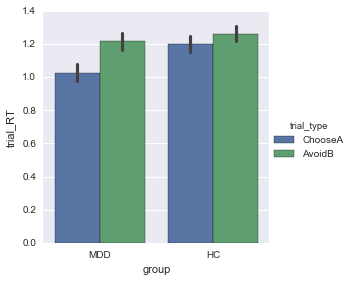

In [193]:
# Let's look at the Group x TT on correct trials . . . if anything, MDD < HC on Choose A (unexpected).
# This isn't justified by the ANOVA but I wanted to check out what's happening with the groups . . . 

sns.factorplot(y='trial_RT',x='group',hue='trial_type',hue_order=['ChooseA','AvoidB'], units='subject',ci=68,
               kind='bar', data=chAavB[chAavB.trial_accuracy == 1], order = ['MDD','HC'])

In [194]:
# Let's get descriptives for the TT effect . . . people are faster on Choose A than on Avoid B
df = misc.MakeFrame(in_df=chAavB,id_vars=['group','subject','trial_type'],dv=['trial_RT','lnRT'])
df.head()

print df.groupby('trial_type')['trial_RT'].mean()
print df.groupby('trial_type')['trial_RT'].std()

trial_type
AvoidB     1.293428
ChooseA    1.150490
Name: trial_RT, dtype: float64
trial_type
AvoidB     0.284221
ChooseA    0.273357
Name: trial_RT, dtype: float64


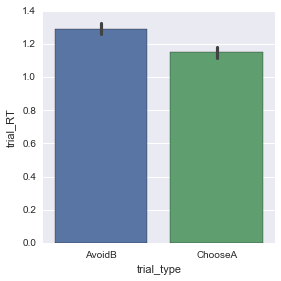

In [195]:
sns.factorplot(y='trial_RT', x='trial_type', units='subject', kind='bar', ci=68, data=df)
sns.plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_RT.pdf')

In [196]:
# . . . and the accuracy effect . . . accurate decisions are made more quickly.
df = misc.MakeFrame(in_df=chAavB,id_vars=['group','subject','trial_accuracy'],dv=['trial_RT','lnRT'])
df.head()

print df.groupby('trial_accuracy')['trial_RT'].mean()
print df.groupby('trial_accuracy')['trial_RT'].std()

trial_accuracy
0    1.380637
1    1.175408
Name: trial_RT, dtype: float64
trial_accuracy
0    0.360913
1    0.242126
Name: trial_RT, dtype: float64


In [197]:
sns.factorplot(y='trial_RT', x='trial_accuracy', units='subject', kind='bar', ci=68, data=df)
sns.plt.savefig(path2figs + 'PST_Test_AccEffect_RT.pdf')

### Accuracy

In [198]:
# No effects at all on accuracy . . . not unusual for there to be no TT effect, was hoping we'd see a Group effect.
%R chAavB_acc.aov <- aov_ez(id='subject',dv='trial_accuracy', within='trial_type', between='group', data=chAavB,\
                           anova_table=list(correction='GG',es='pes'))
%R print(chAavB_acc.aov)

Anova Table (Type 3 tests)

Response: trial_accuracy
            Effect    df  MSE    F    pes p.value
1            group 1, 64 0.04 0.02  .0004     .88
2       trial_type 1, 64 0.08 0.00 <.0001     .96
3 group:trial_type 1, 64 0.08 0.68    .01     .41

Sphericity correction method: GG 


In [199]:
# Nothing doing, and if anything the MDDs are worse on Avoid B . . . interesting, and runs counter to my 
# "number of times you choose B during training predicts Avoid B accuracy at test" hypothesis.

sns.factorplot(y='trial_accuracy',x='trial_type',hue='group',units='subject',ci=68,kind='bar',data=chAavB,
              hue_order = ['MDD','HC'])
sns.plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_Acc.pdf')

In [200]:
# Typically there's a strong correlation b/w ChA-AvB accuracy and RT diffs at test, let's see if that's true for us

df = misc.MakeFrame(in_df=chAavB,id_vars=['subject','group','trial_type'],dv=['trial_accuracy','trial_RT'])
df.head()

subject group trial_type  trial_accuracy  trial_RT
0  RMD003   MDD     AvoidB        0.729167  0.899667
1  RMD003   MDD    ChooseA        0.416667  1.001396
2  RMD004    HC     AvoidB        0.937500  1.239604
3  RMD004    HC    ChooseA        0.958333  1.117208
4  RMD005    HC     AvoidB        0.979167  1.197042

In [201]:
chA = df[df.trial_type == 'ChooseA']
chA_cols = ['subject','group','trial_type','chA_acc','chA_RT']
chA.columns = chA_cols
chA = chA[['subject','group','chA_acc','chA_RT']]

avB = df[df.trial_type == 'AvoidB']
avB_cols = ['subject','group','trial_type','avB_acc','avB_RT']
avB.columns = avB_cols
avB = avB[['subject','avB_acc','avB_RT']]

both = pd.merge(chA,avB,on='subject')
both['chA_vs_avB_acc'] = both.chA_acc - both.avB_acc
both['chA_vs_avB_RT'] = both.chA_RT - both.avB_RT
both.head()

subject group   chA_acc    chA_RT   avB_acc    avB_RT  chA_vs_avB_acc  \
0  RMD003   MDD  0.416667  1.001396  0.729167  0.899667       -0.312500   
1  RMD004    HC  0.958333  1.117208  0.937500  1.239604        0.020833   
2  RMD005    HC  0.229167  1.352125  0.979167  1.197042       -0.750000   
3  RMD009    HC  0.729167  1.321875  0.979167  1.443562       -0.250000   
4  RMD010    HC  0.958333  1.255729  0.625000  1.352813        0.333333   

   chA_vs_avB_RT  
0       0.101729  
1      -0.122396  
2       0.155083  
3      -0.121688  
4      -0.097083

r = -0.690, p = 1.41e-10


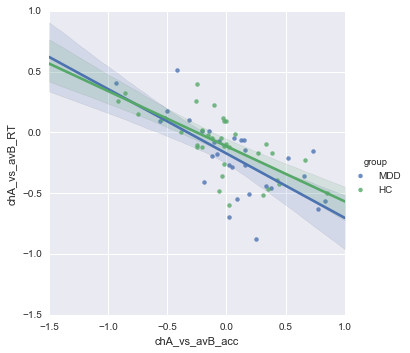

In [202]:
# Yup, as expected--looks good. 
sns.lmplot(y='chA_vs_avB_RT', x='chA_vs_avB_acc', hue='group', data=both)
sns.plt.savefig(path2figs + 'PST_Test_chA_avB_ACC_RT_correl.pdf')

r, p = sp.stats.pearsonr(both.chA_vs_avB_RT,both.chA_vs_avB_acc)
print 'r = ' + '{:.3f}'.format(r) + ', p = ' + '{:.3}'.format(p)

## Comparing win/win, lose/lose, and win/lose trials . . .  

Another thing we can do with the test data . . . win/win (high conflict Go) trials (AC, AE, CE) vs. lose/lose (high conflict NoGo trials) (BD, BF, DF), vs. win/lose (low conflict Go) trials (AD, AF, CB, CF, EB, ED).

In [203]:
test_clean.pair.unique()

array(['AC', 'DF', 'EB', 'ED', 'BD', 'FB', 'CE', 'EF', 'BA', 'AF', 'CD',
       'BC', 'CF', 'AD', 'AE', 'EC', 'BE', 'DA', 'FD', 'BF', 'DE', 'AB',
       'DB', 'FE', 'CB', 'CA', 'FA', 'EA', 'FC', 'DC'], dtype=object)

In [204]:
def CodeCon(pair):
    '''Code each pair as win/win (high conflict Go), lose/lose (high conflict NoGo), or win/lose (low conflict Go).'''
    
    trained = ['AB','BA','CD','DC','EF','FE']
    ww = ['AC','CA','AE','EA','CE','EC']
    ll = ['BD','DB','BF','FB','DF','FD']
    wl = ['AD','DA','AF','FA','CB','BC','CF','FC','EB','BE','ED','DE']
    
    if pair in trained:
        out = 'trained'
    elif pair in ww:
        out = 'WW'
    elif pair in ll:
        out = 'LL'
    elif pair in wl:
        out = 'WL'
    else:
        print "pair = " + pair + "; I don't recognize that pair, stopping!"
        out = 'none'
    
    return out

test_clean['con_trial_type'] = test_clean.pair.apply(CodeCon) # Conflict trial type

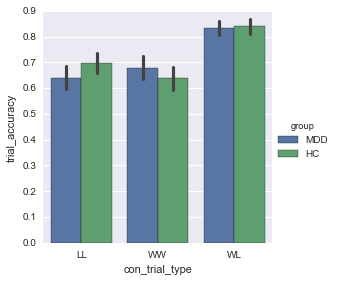

In [206]:
# Accuracy
sns.factorplot(y='trial_accuracy',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=test_clean[~(test_clean.con_trial_type == 'trained')])

In [207]:
# Correct RT
corr = test_clean[test_clean.trial_accuracy == 1]
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=corr[~(corr.con_trial_type == 'trained')])

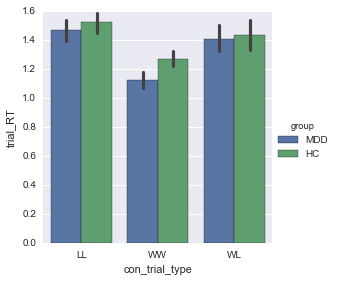

In [208]:
# Error RT
err = test_clean[test_clean.trial_accuracy == 0]
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=err[~(err.con_trial_type == 'trained')])

In [209]:
test_clean.con_trial_type = test_clean.con_trial_type.astype(str)
con_test = test_clean[~(test_clean.con_trial_type == 'nan')]

%Rpush con_test
# %R str(con_test)

%R con_acc.aov <- aov_ez(id='subject',dv='trial_accuracy',within='con_trial_type',between='group',data=con_test)
%R print(con_acc.aov) # Strong effect of trial type, nothing with group . . . 

%R con_RT.aov <- aov_ez(id='subject',dv='trial_RT',within=c('con_trial_type','trial_accuracy'),\
                        between='group',data=con_test)

%R print(con_RT.aov) # Effects of Trial Type and Accuracy, plus Group x TT and TT x Accuracy interactions . . . 

Anova Table (Type 3 tests)

Response: trial_accuracy
                Effect           df  MSE         F   ges p.value
1                group        1, 64 0.05      0.08 .0003     .78
2       con_trial_type 1.92, 122.77 0.07 16.36 ***   .15  <.0001
3 group:con_trial_type 1.92, 122.77 0.07      0.54  .006     .58

Sphericity correction method: GG 


Anova Table (Type 3 tests)

Response: trial_RT
                               Effect           df  MSE         F  ges p.value
1                               group        1, 37 0.66    3.38 +  .05     .07
2                      con_trial_type  2.62, 97.11 0.07  7.83 ***  .03   .0002
3                group:con_trial_type  2.62, 97.11 0.07      2.04 .009     .12
4                      trial_accuracy        1, 37 0.07 34.10 ***  .06  <.0001
5                group:trial_accuracy        1, 37 0.07    5.22 * .009     .03
6       con_trial_type:trial_accuracy 2.71, 100.43 0.06   5.40 **  .02    .002
7 group:con_trial_type:trial_accuracy 2.71, 100.43 0.06      0.29 .001     .81

Sphericity correction method: GG 


There's probably more we can do here, pausing for now . . . 

### Looking at the relationship between training accuracy, the discrepancy b/w reinforcment rates for specific stimuli, and test accuracy 

In [210]:
train_acc = misc.MakeFrame(in_df=train_clean,id_vars='subject',dv='accuracy',agg_func='mean')
new_cols = ['subject','train_acc']
train_acc.columns = new_cols
train_acc.head()

subject  train_acc
0  RMD003   0.820084
1  RMD004   0.772152
2  RMD005   0.544304
3  RMD007   0.654709
4  RMD009   0.799163

In [211]:
test_train = pd.merge(test_clean,train_acc,on='subject')
test_train.head()
test_train = test_train[~(test_train.con_trial_type == 'trained')]

In [212]:
df = misc.MakeFrame(in_df=test_train,id_vars=['subject','group','difference','train_acc'],
                    dv='trial_accuracy',agg_func='mean')
df.head

<bound method DataFrame.head of     subject group  difference  train_acc  trial_accuracy
0    RMD003   MDD          10   0.820084        0.395833
1    RMD003   MDD          20   0.820084        0.375000
2    RMD003   MDD          30   0.820084        0.833333
3    RMD003   MDD          40   0.820084        0.750000
4    RMD003   MDD          50   0.820084        0.791667
5    RMD004    HC          10   0.772152        0.750000
6    RMD004    HC          20   0.772152        0.875000
7    RMD004    HC          30   0.772152        1.000000
8    RMD004    HC          40   0.772152        1.000000
9    RMD004    HC          50   0.772152        1.000000
10   RMD005    HC          10   0.544304        0.520833
11   RMD005    HC          20   0.544304        0.583333
12   RMD005    HC          30   0.544304        0.608696
13   RMD005    HC          40   0.544304        0.750000
14   RMD005    HC          50   0.544304        0.583333
15   RMD009    HC          10   0.799163        0.666667

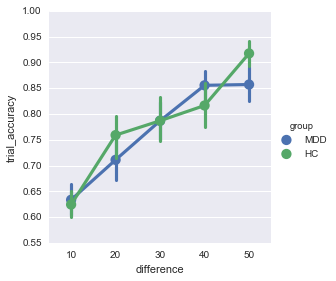

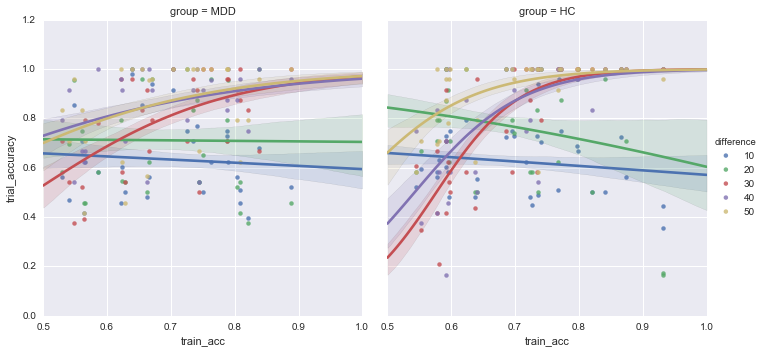

In [216]:
sns.factorplot(y='trial_accuracy',x='difference',hue='group',units='subject',ci=68,data=test_train)
sns.lmplot(y='trial_accuracy',x='train_acc',logistic=True,hue='difference',units='subject',ci=68,
           col='group',data=df)
# sns.plt.xlim(0.4,1.0)
# sns.plt.ylim(0.0,1.0)

In [217]:
# This model isn't converging and it's odd to me that coeff for difference is negative. Double-check and re-run . . 

test_train.con_trial_type = test_train.con_trial_type.astype(str)
test_train.WTAR_NatEng = test_train.WTAR_NatEng.astype(str)
%Rpush test_train
# %R str(test_train)

%R test_train$difference <- scale(test_train$difference)

%R test_train.fm1 <- glmer(trial_accuracy ~  difference + train_acc + (1|subject), family=binomial, data=test_train)
%R test_train.fm2 <- glmer(trial_accuracy ~  difference*train_acc + (1|subject), family=binomial, data=test_train)
%R test_train.fm3 <- glmer(trial_accuracy ~  difference*train_acc*group + (1|subject), family=binomial, data=test_train)

%R test_train.aov <- anova(test_train.fm1,test_train.fm2,test_train.fm3)
%R print(test_train.aov)
%R print(summary(test_train.fm3))

Data: test_train
Models:
test_train.fm1: trial_accuracy ~ difference + train_acc + (1 | subject)
test_train.fm2: trial_accuracy ~ difference * train_acc + (1 | subject)
test_train.fm3: trial_accuracy ~ difference * train_acc * group + (1 | subject)
               Df    AIC    BIC  logLik deviance   Chisq Chi Df Pr(>Chisq)    
test_train.fm1  4 9460.6 9489.3 -4726.3   9452.6                              
test_train.fm2  5 9247.0 9282.8 -4618.5   9237.0 215.604      1  < 2.2e-16 ***
test_train.fm3  9 9224.2 9288.6 -4603.1   9206.2  30.853      4   3.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: trial_accuracy ~ difference * train_acc * group + (1 | subject)
   Data: test_train

     AIC      BIC   logLik deviance df.resid 
  9224.2   9288.6  -4603.1   9206.2     9446 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-11.1213   0.0492   0.3456   0.6098   1.6913 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.6486   0.8053  
Number of obs: 9455, groups:  subject, 66

Fixed effects:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -2.1767     0.9706  -2.243 0.024928 *  
difference                     -3.1523     0.2987 -10.552  < 2e-16 ***
train_acc                       5.3105     1.3743   3.864 0.000111 ***
groupMDD                        1.9039     1.4639   1.301 0.193398    
difference:train_acc            5.7309     0.4591  12.483  < 2e-16 ***


## Model training 

In [117]:
%cd ~/Work/Expts/Code
import RL_fit

/Users/ebarrick/Work/Expts/Code


In [118]:
s3 = train_clean[train_clean.subject == 'RMD003']


In [119]:
def WinStayCheck(df):
    '''For each pair, check on subject's last choice and feedback. If the last feedback was a reward and the subject
    sticks with the same choice, that's a win-stay trial. If the last feedback was a reward and subject changes choice,
    that's a win-shift trial. If the last feedback was a zero and the subject choice stays/shifts, that's lose-stay/
    lose-shift. Assumes the df has a column "ID".'''
    
    dfs = []
    for sub in df.subject.unique():
        
        d = {'AB':{'last_choice':'none','last_feedback':'none'},
             'CD':{'last_choice':'none','last_feedback':'none'},
             'EF':{'last_choice':'none','last_feedback':'none'}}
        
        sdf = df[df.subject == sub]
        tt = []
        for i, row_i in sdf.iterrows():
            if d[row_i.pair]['last_choice'] == 'none':
                tt.append(np.nan)

            elif (d[row_i.pair]['last_choice'] == row_i.choice) and (d[row_i.pair]['last_feedback'] == 'reward'):
                tt.append('win-stay')
            
            elif (d[row_i.pair]['last_choice'] != row_i.choice) and (d[row_i.pair]['last_feedback'] == 'reward'):
                tt.append('win-shift')
            
            elif (d[row_i.pair]['last_choice'] == row_i.choice) and (d[row_i.pair]['last_feedback'] == 'zero'):
                tt.append('lose-stay')
            
            elif (d[row_i.pair]['last_choice'] != row_i.choice) and (d[row_i.pair]['last_feedback'] == 'zero'):
                tt.append('lose-shift')

            d[row_i.pair]['last_choice'] = row_i.choice
            d[row_i.pair]['last_feedback'] = row_i.feedback
        
        sdf['trial_type'] = tt
    
        dfs.append(sdf)
    out = pd.concat(dfs)
    out.reset_index(inplace=True,drop=True)
    
    return out

In [120]:
train = WinStayCheck(train_clean)

In [121]:
train.head(20)

index subject group  trial_num  block  trial_RT      lnRT  accuracy  \
0       0  RMD003   MDD          1      1     1.467  0.383219         0   
1       1  RMD003   MDD          2      1     1.134  0.125751         0   
2       2  RMD003   MDD          3      1     0.917 -0.086648         1   
3       3  RMD003   MDD          4      1     1.200  0.182322         0   
4       4  RMD003   MDD          5      1     1.500  0.405465         0   
5       5  RMD003   MDD          6      1     1.284  0.249980         0   
6       6  RMD003   MDD          7      1     2.184  0.781158         1   
7       7  RMD003   MDD          8      1     1.652  0.501987         0   
8       8  RMD003   MDD          9      1     2.034  0.710004         0   
9       9  RMD003   MDD         10      1     1.285  0.250759         0   
10     10  RMD003   MDD         11      1     1.883  0.632866         0   
11     11  RMD003   MDD         12      1     1.650  0.500775         1   
12     12  RMD003   MDD         13      1     1.517  0.416735         0   
13     13  RMD003   MDD         14      1     1.884  0.633397         0   
14     14  RMD003   MDD         15      1     1.285  0.250759         1   
15     15  RMD003   MDD         16      1     1.668  0.511625         0   
16     16  RMD003   MDD         17      1     1.950  0.667829         1   
17     17  RMD003   MDD         18      1     1.701  0.531216         0   
18     18  RMD003   MDD         19      1     1.601  0.470628         0   
19     19  RMD003   MDD         20      1     1.667  0.511026         1   

        left_stim  left_stim_number     right_stim  right_stim_number  \
0   Stimuli/1.bmp                 2  Stimuli/5.bmp                  5   
1   Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
2   Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
3   Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
4   Stimuli/5.bmp                 5  Stimuli/1.bmp                  2   
5   Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
6   Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
7   Stimuli/5.bmp                 5  Stimuli/1.bmp                  2   
8   Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
9   Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
10  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
11  Stimuli/5.bmp                 5  Stimuli/1.bmp                  2   
12  Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
13  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
14  Stimuli/5.bmp                 5  Stimuli/1.bmp                  2   
15  Stimuli/1.bmp                 2  Stimuli/5.bmp                  5   
16  Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
17  Stimuli/3.bmp                 6  Stimuli/6.bmp                  1   
18  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
19  Stimuli/1.bmp                 2  Stimuli/5.bmp                  5   

    object_onset  object_duration response  response_onset  isi_onset  \
0         14.970            3.000    right          16.437     17.970   
1         24.471            3.000    right          25.605     27.471   
2         29.471            3.000     left          30.388     32.471   
3         37.972            3.000    right          39.172     40.971   
4         44.472            3.000     left          45.973     47.472   
5         49.972            3.000    right          51.257     52.972   
6         60.457            3.000     left          62.641     63.456   
7         69.457            3.000     left          71.124     72.457   
8         76.958            3.000    right          78.992     79.957   
9         84.958            3.000    right          86.258     87.958   
10        89.964            2.999    right          91.847     92.963   
11        95.464  

In [122]:
# Now how about a graph of the evolution of win-stay trials as a function of pair type and block number?
# First need to do some legwork . . . 

g = train.groupby(['subject','group','block','pair'])['trial_type'].value_counts()
df = g.to_frame()
df.reset_index(inplace=True)
new_cols = ['subject','group','block','pair', 'trial_type','count']
df.columns = new_cols
df.head()

# Now compute percentages
d = {}
for sub in df.subject.unique():
    for curr_block in range(1,5):
        for curr_pair in ['AB','CD','EF']:
            count_sum = df[(df.subject == sub) & (df.block == curr_block) & (df.pair == curr_pair)]['count'].sum()
            d[(sub,curr_block,curr_pair)] = count_sum #

# I'm sure there is a better way, but this works . . . 
pcts = []
for i, row_i in df.iterrows():
    count_sum = d[(row_i.subject,row_i.block,row_i.pair)]
    pct = float(row_i['count'])/count_sum
    pcts.append(pct)
df['pct'] = pcts

In [123]:
df.head()

subject group  block pair  trial_type  count       pct
0  RMD003   MDD      1   AB    win-stay      8  0.421053
1  RMD003   MDD      1   AB   lose-stay      7  0.368421
2  RMD003   MDD      1   AB  lose-shift      2  0.105263
3  RMD003   MDD      1   AB   win-shift      2  0.105263
4  RMD003   MDD      1   CD    win-stay      6  0.315789

In [124]:
df.tail()

subject group  block pair  trial_type  count   pct
3339  RMD099   MDD      4   CD  lose-shift      1  0.05
3340  RMD099   MDD      4   CD   win-shift      1  0.05
3341  RMD099   MDD      4   EF    win-stay     10  0.50
3342  RMD099   MDD      4   EF   lose-stay      5  0.25
3343  RMD099   MDD      4   EF  lose-shift      5  0.25

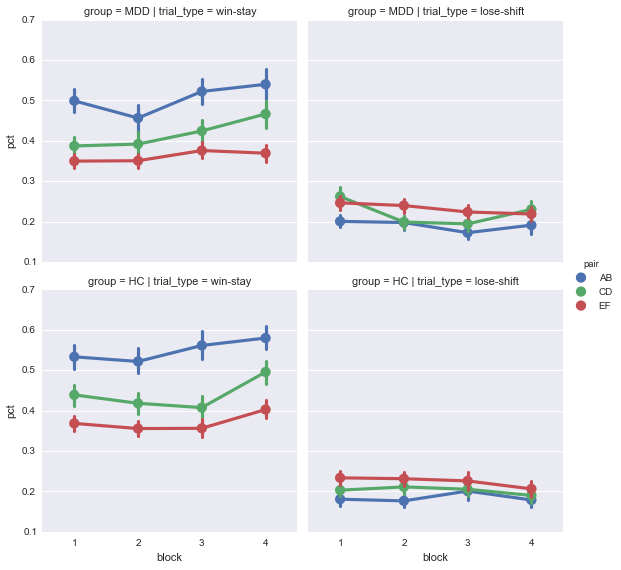

In [125]:
sns.factorplot(y='pct',x='block',hue='pair',col='trial_type',row='group',units='subject',ci=68,
               data=df[((df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift'))])

In [126]:
#still pair x TT interaction...nothing with group
ws = df[(df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift')]

%Rpush ws
%R ws$block <- as.factor(ws$block)
%R str(ws)

%R ws.aov <- aov_ez(id='subject',dv='pct',within=c('block','pair','trial_type'),between='group',data=ws,\
                   anova_table=list(correction='GG',es='pes'))
%R print(ws.aov)

'data.frame':	1711 obs. of  7 variables:
 $ subject   : Factor w/ 75 levels "RMD003","RMD004",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ group     : Factor w/ 2 levels "HC","MDD": 2 2 2 2 2 2 2 2 2 2 ...
 $ block     : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 2 2 2 2 ...
 $ pair      : Factor w/ 3 levels "AB","CD","EF": 1 1 2 2 3 3 1 2 2 3 ...
 $ trial_type: Factor w/ 2 levels "lose-shift","win-stay": 2 1 2 1 2 1 2 2 1 2 ...
 $ count     : int  8 2 6 4 6 6 16 8 5 7 ...
 $ pct       : num  0.421 0.105 0.316 0.211 0.316 ...


                        Effect           df  MSE         F  pes p.value
1                        group        1, 34 0.02      1.45  .04     .24
2                        block  2.77, 94.32 0.01    2.78 *  .08     .05
3                  group:block  2.77, 94.32 0.01      1.89  .05     .14
4                         pair  2.00, 67.96 0.01 21.53 ***  .39  <.0001
5                   group:pair  2.00, 67.96 0.01      0.73  .02     .49
6                   trial_type        1, 34 0.09 44.83 ***  .57  <.0001
7             group:trial_type        1, 34 0.09    3.35 +  .09     .08
8                   block:pair 4.32, 146.71 0.01      1.06  .03     .38
9             group:block:pair 4.32, 146.71 0.01      1.29  .04     .27
10            block:trial_type  2.54, 86.50 0.03      1.38  .04     .26
11      group:block:trial_type  2.54, 86.50 0.03      0.83  .02     .47
12             pair:trial_type  1.89, 64.22 0.03 13.67 ***  .29  <.0001
13       group:pair:trial_type  1.89, 64.22 0.03      0.04 .001 

In [127]:
%R ws.lsm <- lsmeans(ws.aov, ~ pair*trial_type)
%R print(ws.lsm)
%R print(pairs(ws.lsm))

 pair trial_type    lsmean         SE     df  lower.CL  upper.CL
 AB   lose.shift 0.2359425 0.01267695 139.77 0.2108791 0.2610058
 CD   lose.shift 0.2558952 0.01272358 141.30 0.2307421 0.2810484
 EF   lose.shift 0.2749982 0.01268089 139.68 0.2499269 0.3000695
 AB   win.stay   0.4783173 0.01267695 139.77 0.4532540 0.5033807
 CD   win.stay   0.3868390 0.01272358 141.30 0.3616859 0.4119922
 EF   win.stay   0.3514332 0.01268089 139.68 0.3263619 0.3765046

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast                         estimate         SE     df t.ratio p.value
 AB,lose.shift - CD,lose.shift -0.01995278 0.01345349 210.65  -1.483  0.6755
 AB,lose.shift - EF,lose.shift -0.03905572 0.01333205 207.38  -2.929  0.0432
 AB,lose.shift - AB,win.stay   -0.24237486 0.02333947 102.47 -10.385  <.0001
 AB,lose.shift - CD,win.stay   -0.15089658 0.02131792  76.94  -7.078  <.0001
 AB,lose.shift - EF,win.stay   -0.11549077 0.02126189  76.18  -5.432  <.0001
 CD,lose.shift - EF,lose.shift -0.01910294 0.01346465 207.18  -1.419  0.7156
 CD,lose.shift - AB,win.stay   -0.22242208 0.02131792  76.94 -10.434  <.0001
 CD,lose.shift - CD,win.stay   -0.13094380 0.02342029 103.53  -5.591  <.0001
 CD,lose.shift - EF,win.stay   -0.09553799 0.02125657  76.11  -4.495  0.0003
 EF,lose.shift - AB,win.stay   -0.20331914 0.02126189  76.18  -9.563  <.0001
 EF,lose.shift - CD,win.stay   -0.11184086 0.02125657  76.11  -5.261  <.0001
 EF,lose.shift - EF,win.stay   -0.07643505 0.02340177 103.29  -3.266  0.0180

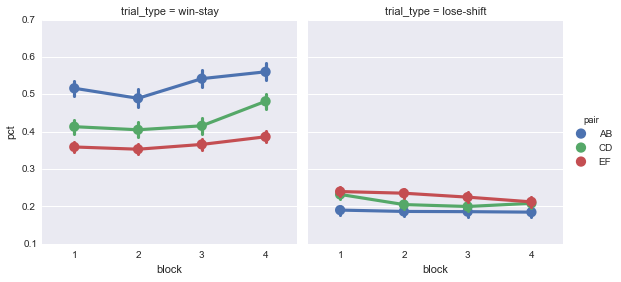

In [128]:
sns.factorplot(y='pct',x='block',hue='pair',col='trial_type',units='subject',ci=68,
               data=df[((df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift'))])

## Modeling Training

In [129]:
# Re-code the data to make modeling easier . . . 

train['state'] = train.pair
train.state = train.state.replace({'AB':1,'CD':2,'EF':3})
train['action'] = train.choice
train.action = train.action.replace({'A':1,'C':2,'E':3,'F':4,'D':5,'B':6})
train['reward'] = train.feedback
train.reward = train.reward.replace({'zero':0,'reward':1})

In [130]:
def RL_eq(Q_old,fdbk,alpha_loss,alpha_gain):
    '''Given old Q value and feedback, compute new Q value, using different alphas for gains vs. losses.'''
    
    Q_new = np.nan
    PE = np.nan
    
    if fdbk == 1:
        PE = fdbk - Q_old
        Q_new = Q_old + (alpha_gain * PE)
    
    elif fdbk == 0:
        PE = fdbk - Q_old
        Q_new = Q_old + (alpha_loss * PE)
    
    return (Q_new,PE)   

In [131]:
def SoftMax(Q_Chosen,Q_NotChosen,beta):
    '''Given Q values for actions chosen and not chosen, compute the probability of the chosen action via the
    softmax function.'''
    
    
    numerator = np.power(np.e,(Q_Chosen/beta))
    denomenator = numerator + (np.power(np.e,(Q_NotChosen/beta)))
    
    prob_chosen = numerator/denomenator
    
    return prob_chosen

In [132]:
def RL_likelihood(params,df):
    '''Given alpha_gain, alpha_loss, beta, and the df (rows of state, action, reward), return -logp.'''

    ag,al,b = params
    
    Q = {1:{1:0.5,6:0.5},2:{2:0.5,5:0.5},3:{3:0.5,4:0.5}} # All Q-values initialized to 0.5 (not good, not bad)

    logp = 0
    for i, row_i in df.iterrows():
        Qs = Q[row_i.state] # Get the Q values for this state
        Q_Chosen = Qs[row_i.action] # Give me the Q value for the chosen stimulus
        for k in Qs.keys(): # Look through the stimuli . . . 
            if k != row_i.action: # . . . if you see a stimulus that's not the chosen stimulus . . . 
                Q_NotChosen = Qs[k] # . .. then that must be the not-chosen stimulus, so give me its Q-value.

        prob_chosen = SoftMax(Q_Chosen,Q_NotChosen,b)
        logp = logp + np.log(prob_chosen)
        Q_new, PE = RL_eq(Q_old=Q[row_i.state][row_i.action],fdbk=row_i.reward,
                                             alpha_loss=al,alpha_gain=ag)
        Q[row_i.state][row_i.action] = Q_new

    # Use negative log likelihood because the optimizer will search for the minimum (thus = max LL).
    return -logp 

In [133]:
# Find the optimum alpha_gain, alpha_loss, and beta values for each subject

def OptFit(df):
    '''Given a df that consists of state, action, reward cols, use fmin to search for the best-fitting alpha_gain, 
    alpha_loss, and beta.'''
    
    opt_final = (0,99999999) # You're going to replace this w/opt_new, where you'll need to call item 1, so start now.
    
    # Optimize the model fit. For each subject, try three different sets of starting params to avoid converge fails.
    for params in [(0.1,0.1,1),(0.5,0.5,10),(0.9,0.9,19)]:
        
        opt_new = sp.optimize.fmin(RL_likelihood, [params[0], params[1], params[2]], args=(df,), full_output=True)
    
        if opt_new[1] < opt_final[1]:
            opt_final = opt_new
    
    best_ag = opt_new[0][0]
    best_al = opt_new[0][1]
    best_b = opt_new[0][2]
    min_val = opt_new[1]
    
    if best_ag < 0:
        best_ag = 0
    elif best_ag > 1:
        best_ag = 1
    
    if best_al < 0:
        best_al = 0
    elif best_al > 1:
        best_al = 1
           
    if best_b < 0:
        best_b = 0  
    elif best_b > 20:
        best_b = 20
    
    # Now that we have the best values, let's add them to the df.
    df['alpha_gain'] = best_ag
    df['alpha_loss'] = best_al
    df['beta'] = best_b
    
    # Now go through the df, with the best fitting alphas, and generate PE and Q on each trial.
    PEs = []
    Qs = []
    
    Q = {1:{1:0.5,6:0.5},2:{2:0.5,5:0.5},3:{3:0.5,4:0.5}} # Q-values initialized to 0.5 (not good, not bad)

    for i, row_i in df.iterrows():
        Q_new, PE = RL_eq(Q_old=Q[row_i.state][row_i.action],fdbk=row_i.reward,
                                             alpha_loss=best_al,alpha_gain=best_ag)
        Q[row_i.state][row_i.action] = Q_new
        Qs.append(Q_new)
        PEs.append(PE)
    df['Q'] = Qs
    df['PE'] = PEs
            
    return df

In [134]:
out = []
for sub in train.subject.unique():
     df = OptFit(train[train.subject == sub])
     out.append(df)

model_train = pd.concat(out)
# model_train.to_csv(path2asys + 'model_train.csv', index=False)

Optimization terminated successfully.
         Current function value: 98.642431
         Iterations: 88
         Function evaluations: 157
Optimization terminated successfully.
         Current function value: 98.642431
         Iterations: 163
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 109.477670
         Iterations: 157
         Function evaluations: 290
Optimization terminated successfully.
         Current function value: 103.578379
         Iterations: 99
         Function evaluations: 180
Optimization terminated successfully.
         Current function value: 103.578379
         Iterations: 141
         Function evaluations: 254
Optimization terminated successfully.
         Current function value: 103.578379
         Iterations: 126
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 161.304644
         Iterations: 95
         Function evaluations: 166
Optimizatio

In [135]:
model_train.head()

index subject group  trial_num  block  trial_RT      lnRT  accuracy  \
0      0  RMD003   MDD          1      1     1.467  0.383219         0   
1      1  RMD003   MDD          2      1     1.134  0.125751         0   
2      2  RMD003   MDD          3      1     0.917 -0.086648         1   
3      3  RMD003   MDD          4      1     1.200  0.182322         0   
4      4  RMD003   MDD          5      1     1.500  0.405465         0   

       left_stim  left_stim_number     right_stim  right_stim_number  \
0  Stimuli/1.bmp                 2  Stimuli/5.bmp                  5   
1  Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
2  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
3  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
4  Stimuli/5.bmp                 5  Stimuli/1.bmp                  2   

   object_onset  object_duration response  response_onset  isi_onset  \
0        14.970                3    right          16.437     17.970   
1        24.471                3    right          25.605     27.471   
2        29.471                3     left          30.388     32.471   
3        37.972                3    right          39.172     40.971   
4        44.472                3     left          45.973     47.472   

   isi_duration  scheduled_outcome feedback  feedback_onset  \
0         4.984                  0   reward          22.954   
1         0.500                  1     zero          27.971   
2         0.500                  1   reward          32.971   
3         0.500                  1     zero          41.471   
4         1.000                  1     zero          48.472   

   feedback_duration  iti_onset  iti_duration Group  Age Gender Race  \
0              1.000     23.954         0.517   MDD   43      F    W   
1              1.000     28.970         0.500   MDD   43      F    W   
2              0.983     33.954         4.017   MDD   43      F    W   
3              0.983     42.455         2.017   MDD   43      F    W   
4              0.983     49.455         0.517   MDD   43      F    W   

  Ethnicity Marital_Status    Education_Level  Education_Years Occupation  \
0        NH      Separated  technical college               12       chef   
1        NH      Separated  technical college               12       chef   
2        NH      Separated  technical college               12       chef   
3        NH      Separated  technical college               12       chef   
4        NH      Separated  technical college               12       chef   

  Highest Degree Income  Eligible  BDI_total  CC_total  BAS_D  BAS_FS  BAS_RR  \
0            nan    nan         1         18        13     14      13      19   
1            nan    nan         1         18        13     14      13      19   
2            nan    nan         1         18        13     14      13      19   
3            nan    nan         1         18        13     14      13      19   
4            nan    nan         1         18        13     14      13      19   

   BIS  MASQ_GDA  MASQ_AA  MASQ_GDD  MASQ_AD  AES_total  STAI_Trait  \
0   25        23       18        28       91         44          41   
1   25        23       18        28       91         44          41   
2   25        23       18        28       91         44          41   
3   25        23       18        28       91         44          41   
4   25        23       18        28       91         44          41   

   STAI_State  SHAPS  PSQI_Duration  PSQI_Disturb  PSQI_Latency  PSQI_DayDys  \
0          68      2              1             2             2            0   
1          68      2              1             2             2            0   
2          68      2              1             2             2            0   
3          68      2              1             2             2            0   
4          68      2              1             2             2            0   

   PSQI_Efficiency  PS

In [136]:
model_train.alpha_gain.describe()

count    17622.000000
mean         0.455895
std          0.348075
min          0.006521
25%          0.142032
50%          0.376038
75%          0.775576
max          1.000000
Name: alpha_gain, dtype: float64

In [137]:
model_train.alpha_loss.describe()

count    17622.000000
mean         0.269154
std          0.313181
min          0.000000
25%          0.025904
50%          0.106184
75%          0.401674
max          1.000000
Name: alpha_loss, dtype: float64

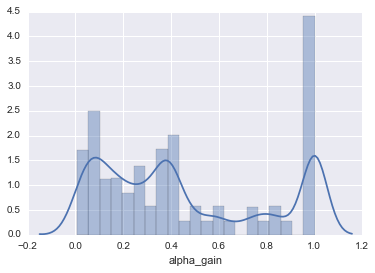

In [138]:
sns.distplot(model_train.alpha_gain)

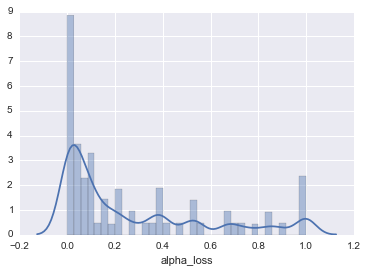

In [139]:
sns.distplot(model_train.alpha_loss)

In [140]:
model_train.beta.describe()

count    17622.000000
mean         0.904514
std          2.512280
min          0.023657
25%          0.183614
50%          0.303966
75%          0.550147
max         20.000000
Name: beta, dtype: float64

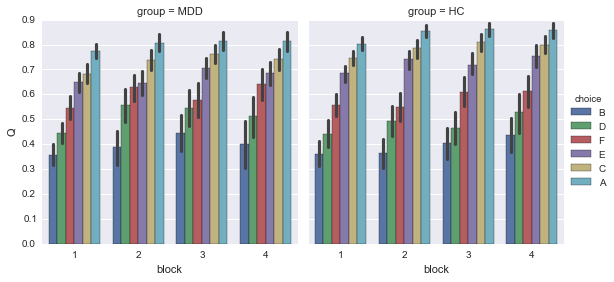

In [141]:
sns.factorplot(y='Q',x='block',hue='choice',hue_order=['B','D','F','E','C','A'],col='group',units='subject',
               kind='bar',ci=68,data=model_train)

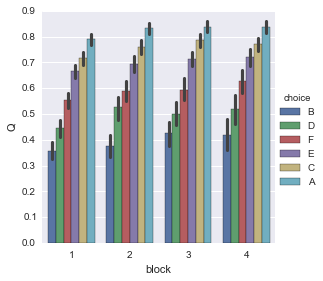

In [142]:
sns.factorplot(y='Q',x='block',hue='choice',hue_order=['B','D','F','E','C','A'],units='subject',
               kind='bar',ci=68,data=model_train)

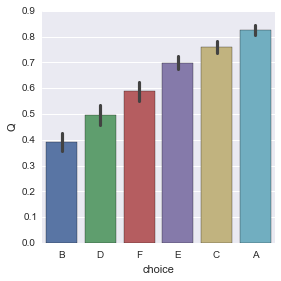

In [143]:
sns.factorplot(y='Q',x='choice',order=['B','D','F','E','C','A'],units='subject',
               kind='bar',ci=68,data=model_train)

In [144]:
%Rpush model_train
%R model_train$block <- as.factor(model_train$block)
%R str(model_train)

'data.frame':	17622 obs. of  92 variables:
 $ index                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ subject              : Factor w/ 75 levels "RMD003","RMD004",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ group                : Factor w/ 2 levels "HC","MDD": 2 2 2 2 2 2 2 2 2 2 ...
 $ trial_num            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ block                : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ trial_RT             : num  1.467 1.134 0.917 1.2 1.5 ...
 $ lnRT                 : num  0.3832 0.1258 -0.0866 0.1823 0.4055 ...
 $ accuracy             : int  0 0 1 0 0 0 1 0 0 0 ...
 $ left_stim            : Factor w/ 6 levels "Stimuli/1.bmp",..: 1 4 6 6 5 4 4 5 6 4 ...
 $ left_stim_number     : int  2 3 1 1 5 3 3 5 1 3 ...
 $ right_stim           : Factor w/ 6 levels "Stimuli/1.bmp",..: 5 2 3 3 1 2 2 1 3 2 ...
 $ right_stim_number    : int  5 4 6 6 2 4 4 2 6 4 ...
 $ object_onset         : num  15 24.5 29.5 38 44.5 ...
 $ object_duration      : num  3 3 3 3 3 3 3 3 3 3 ...
 

In [145]:
%R q.fm1 <- glmer(Q ~  choice + group + block + (1|subject), family=binomial, data=model_train)
%R q.fm2 <- glmer(Q ~  choice*group*block*(1|subject), family=binomial, data=model_train)

%R q_fm.aov <- anova(q.fm1,q.fm2)
%R print(q_fm.aov)
%R print(summary(q.fm2))

Data: model_train
Models:
q.fm1: Q ~ choice + group + block + (1 | subject)
q.fm2: Q ~ choice * group * block * (1 | subject)
      Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
q.fm1 11 11746 11832 -5862.0    11724                             
q.fm2 49 11664 12045 -5783.1    11566 157.71     38  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Correlation matrix not shown by default, as p = 48 > 12.
Use print(summary(q.fm2), correlation=TRUE)  or
	 vcov(summary(q.fm2))	 if you need it


  res = super(Function, self).__call__(*new_args, **new_kwargs)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Q ~ choice * group * block * (1 | subject)
   Data: model_train

     AIC      BIC   logLik deviance df.resid 
 11664.2  12045.3  -5783.1  11566.2    17573 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-15.3252  -0.2696   0.0560   0.2393   8.1149 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 4.771    2.184   
Number of obs: 17622, groups:  subject, 75

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              3.34828    0.39948   8.382  < 2e-16 ***
choiceB                 -4.74789    0.29681 -15.996  < 2e-16 ***
choiceC                 -1.07306    0.23344  -4.597 4.29e-06 ***
choiceD                 -3.82937    0.25724 -14.886  < 2e-16 ***
choiceE                 -1.64663    0.23364  -7.048 1.82e-12 ***
choiceF                 -2.82503    0.23691 -11.924  < 

In [146]:
model_train.trial_type = model_train.trial_type.astype(str)
%Rpush model_train
%R model_train$block <- as.factor(model_train$block)
# %R str(model_train)

%R q.aov <- aov_ez(dv='Q',id='subject',within=c('choice','block'),between='group',data=model_train,\
                  anova_table=list(correction='GG',es='pes'))
%R print(q.aov)
%R q.lsm <- lsmeans(q.aov, ~choice)
%R print(q.lsm)
%R print(pairs(q.lsm))

              Effect           df  MSE          F   pes p.value
1              group        1, 41 1.30       0.01 .0003     .91
2             choice  2.03, 83.31 0.07 153.67 ***   .79  <.0001
3       group:choice  2.03, 83.31 0.07       0.19  .005     .83
4              block  1.93, 78.94 0.03    5.42 **   .12    .007
5        group:block  1.93, 78.94 0.03       0.22  .005     .79
6       choice:block 6.26, 256.66 0.02       1.52   .04     .17
7 group:choice:block 6.26, 256.66 0.02       0.47   .01     .84


 choice    lsmean         SE    df  lower.CL  upper.CL
 A      0.8207107 0.02865126 63.26 0.7634602 0.8779611
 B      0.3918434 0.02892597 65.66 0.3340853 0.4496016
 C      0.7506833 0.02865126 63.26 0.6934328 0.8079337
 D      0.4793882 0.02888857 65.33 0.4216993 0.5370772
 E      0.6994699 0.02867426 63.45 0.6421770 0.7567628
 F      0.5701864 0.02882544 64.77 0.5126142 0.6277586

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast    estimate         SE  df t.ratio p.value
 A - B     0.42886724 0.01551288 343  27.646  <.0001
 A - C     0.07002741 0.01469731 343   4.765  <.0001
 A - D     0.34132244 0.01541514 343  22.142  <.0001
 A - E     0.12124075 0.01476189 343   8.213  <.0001
 A - F     0.25052429 0.01521380 343  16.467  <.0001
 B - C    -0.35883983 0.01551288 343 -23.132  <.0001
 B - D    -0.08754480 0.01609206 343  -5.440  <.0001
 B - E    -0.30762649 0.01557691 343 -19.749  <.0001
 B - F    -0.17834294 0.01598961 343 -11.154  <.0001
 C - D     0.27129503 0.01541514 343  17.599  <.0001
 C - E     0.05121334 0.01476189 343   3.469  0.0077
 C - F     0.18049689 0.01521380 343  11.864  <.0001
 D - E    -0.22008169 0.01548138 343 -14.216  <.0001
 D - F    -0.09079814 0.01586529 343  -5.723  <.0001
 E - F     0.12928355 0.01527845 343   8.462  <.0001

Results are averaged over the levels of: group, block 
P value adjustment: tukey method for comparing a family of 6 estimates 


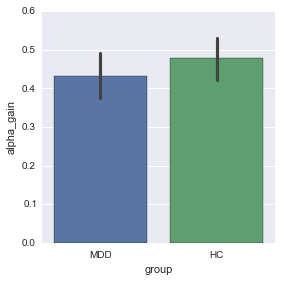

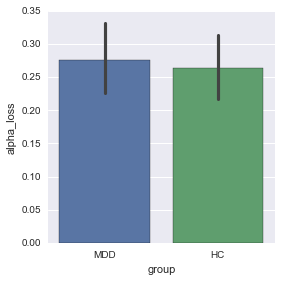

In [147]:
sns.factorplot(y='alpha_gain',x='group',units='subject',kind='bar',ci=68,data=model_train)
sns.factorplot(y='alpha_loss',x='group',units='subject',kind='bar',ci=68,data=model_train)

In [148]:
#No group difference
%R ag.aov <- aov_ez(dv='alpha_gain',id='subject',between='group',data=model_train)
%R print(ag.aov)

%R al.aov <- aov_ez(dv='alpha_loss',id='subject',between='group',data=model_train)
%R print(al.aov)

  Effect    df  MSE    F  ges p.value
1  group 1, 73 0.13 0.29 .004     .59


  Effect    df  MSE    F   ges p.value
1  group 1, 73 0.10 0.03 .0004     .86


In [149]:
misc.ttest_2s(model_train[model_train.Group == 'HC']['alpha_gain'], model_train[model_train.Group == 'MDD']
              ['alpha_gain'],paired=False)

misc.ttest_2s(model_train[model_train.Group == 'HC']['alpha_loss'], model_train[model_train.Group == 'MDD']
              ['alpha_loss'],paired=False)

misc.ttest_2s(model_train[model_train.Group == 'HC']['beta'], model_train[model_train.Group == 'MDD']
              ['beta'],paired=False)

t(17620) = 8.88, p = 0.000, g = 0.134
t(17620) = -2.52, p = 0.012, g = -0.038
t(17620) = -16.96, p = 0.000, g = -0.256


(-16.962416378045987, 5.020166336793522e-64, -0.25558492561203483)

t(74) = 3.87, p = 0.000, g = 0.447


(3.8721150260031951, 0.00023079062321447574, 0.44744249390969004)

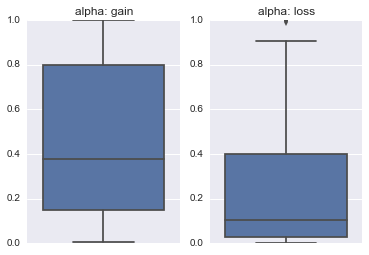

In [150]:
alphas = misc.MakeFrame(in_df=model_train,id_vars=['subject','group'],dv=['alpha_gain','alpha_loss'])
alphas.head()

fig = plt.figure()
ax1 = fig.add_subplot(121)
sns.boxplot(y=alphas.alpha_gain)
ax1.set_ylabel('')
ax1.set_title('alpha: gain')
ax2 = fig.add_subplot(122)
sns.boxplot(y=alphas.alpha_loss)
ax2.set_ylabel('')
ax2.set_title('alpha: loss')

misc.ttest_2s(alphas.alpha_gain,alphas.alpha_loss,paired=True)

In [151]:
alphas.head()

subject group  alpha_gain  alpha_loss
0  RMD003   MDD    1.000000    0.342704
1  RMD004    HC    0.359898    0.000000
2  RMD005    HC    1.000000    0.854176
3  RMD007    HC    0.271219    0.062148
4  RMD009    HC    0.270565    0.000000

In [152]:
model_train.head()

index subject group  trial_num  block  trial_RT      lnRT  accuracy  \
0      0  RMD003   MDD          1      1     1.467  0.383219         0   
1      1  RMD003   MDD          2      1     1.134  0.125751         0   
2      2  RMD003   MDD          3      1     0.917 -0.086648         1   
3      3  RMD003   MDD          4      1     1.200  0.182322         0   
4      4  RMD003   MDD          5      1     1.500  0.405465         0   

       left_stim  left_stim_number     right_stim  right_stim_number  \
0  Stimuli/1.bmp                 2  Stimuli/5.bmp                  5   
1  Stimuli/4.bmp                 3  Stimuli/2.bmp                  4   
2  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
3  Stimuli/6.bmp                 1  Stimuli/3.bmp                  6   
4  Stimuli/5.bmp                 5  Stimuli/1.bmp                  2   

   object_onset  object_duration response  response_onset  isi_onset  \
0        14.970                3    right          16.437     17.970   
1        24.471                3    right          25.605     27.471   
2        29.471                3     left          30.388     32.471   
3        37.972                3    right          39.172     40.971   
4        44.472                3     left          45.973     47.472   

   isi_duration  scheduled_outcome feedback  feedback_onset  \
0         4.984                  0   reward          22.954   
1         0.500                  1     zero          27.971   
2         0.500                  1   reward          32.971   
3         0.500                  1     zero          41.471   
4         1.000                  1     zero          48.472   

   feedback_duration  iti_onset  iti_duration Group  Age Gender Race  \
0              1.000     23.954         0.517   MDD   43      F    W   
1              1.000     28.970         0.500   MDD   43      F    W   
2              0.983     33.954         4.017   MDD   43      F    W   
3              0.983     42.455         2.017   MDD   43      F    W   
4              0.983     49.455         0.517   MDD   43      F    W   

  Ethnicity Marital_Status    Education_Level  Education_Years Occupation  \
0        NH      Separated  technical college               12       chef   
1        NH      Separated  technical college               12       chef   
2        NH      Separated  technical college               12       chef   
3        NH      Separated  technical college               12       chef   
4        NH      Separated  technical college               12       chef   

  Highest Degree Income  Eligible  BDI_total  CC_total  BAS_D  BAS_FS  BAS_RR  \
0            nan    nan         1         18        13     14      13      19   
1            nan    nan         1         18        13     14      13      19   
2            nan    nan         1         18        13     14      13      19   
3            nan    nan         1         18        13     14      13      19   
4            nan    nan         1         18        13     14      13      19   

   BIS  MASQ_GDA  MASQ_AA  MASQ_GDD  MASQ_AD  AES_total  STAI_Trait  \
0   25        23       18        28       91         44          41   
1   25        23       18        28       91         44          41   
2   25        23       18        28       91         44          41   
3   25        23       18        28       91         44          41   
4   25        23       18        28       91         44          41   

   STAI_State  SHAPS  PSQI_Duration  PSQI_Disturb  PSQI_Latency  PSQI_DayDys  \
0          68      2              1             2             2            0   
1          68      2              1             2             2            0   
2          68      2              1             2             2            0   
3          68      2              1             2             2            0   
4          68      2              1             2             2            0   

   PSQI_Efficiency  PS

In [153]:
def RunningTrials(data):
    '''Given block and trial numbers, return a continuous trial count.'''
    block, trial_num = data
    if block == 1:
        out = trial_num
    elif block == 2:
        out = trial_num + 60
    elif block == 3:
        out = trial_num + 120
    elif block == 4:
        out = trial_num + 180
    
    return out
model_train['trial_continuous'] = model_train[['block','trial_num']].apply(RunningTrials,axis=1)

/Users/ebarrick/anaconda/lib/python2.7/site-packages/seaborn/algorithms.py:76: RuntimeWarning: Mean of empty slice
  boot_dist.append(func(*sample, **func_kwargs))


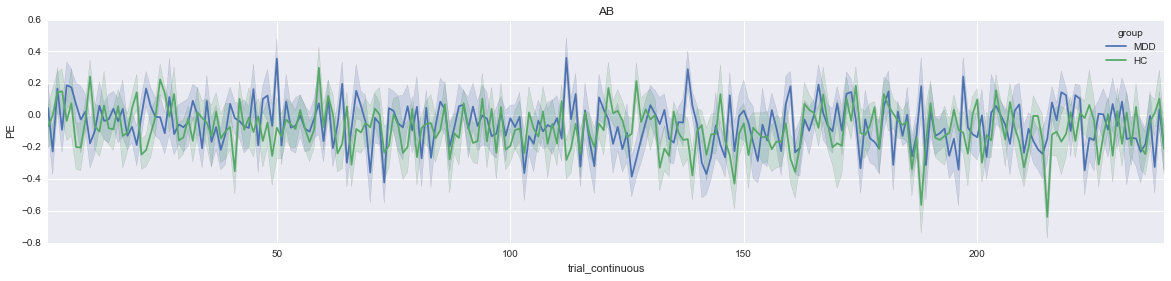

In [154]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax1= sns.tsplot(model_train[model_train.pair == 'AB'],value='PE',unit='subject',condition = 'group',
                time='trial_continuous', estimator=np.nanmean)
ax1.set_title('AB')

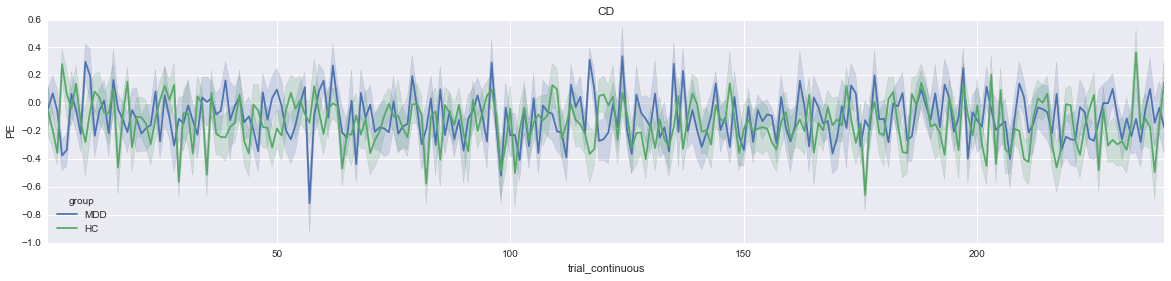

In [155]:
plt.subplots(figsize=(20, 4))
ax2 = sns.tsplot(model_train[model_train.pair == 'CD'],value='PE',unit='subject',condition = 'group',
                 time='trial_continuous',estimator=np.nanmean)
ax2.set_title('CD')

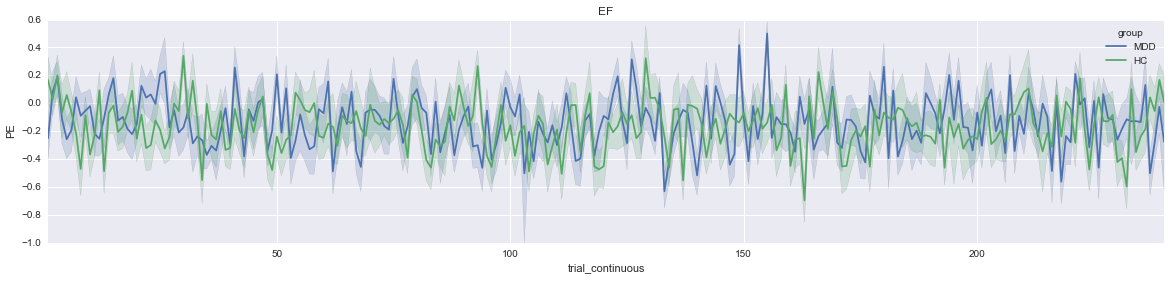

In [156]:
plt.subplots(figsize=(20, 4))
ax3 = sns.tsplot(model_train[model_train.pair == 'EF'],value='PE',unit='subject',condition = 'group',
                 time='trial_continuous',estimator=np.nanmean)
ax3.set_title('EF')

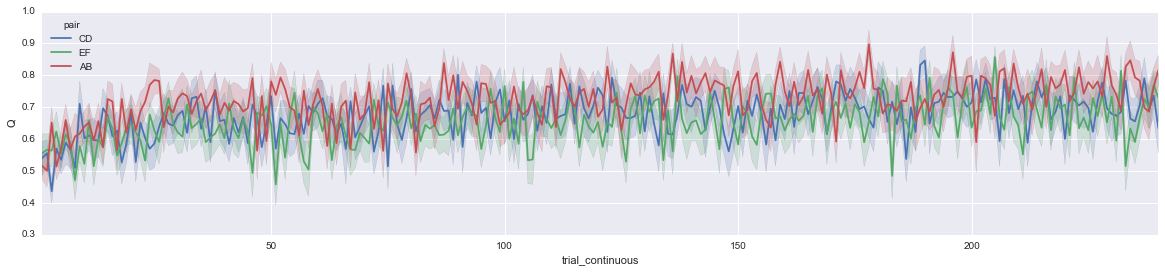

In [157]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
sns.tsplot(model_train,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)

In [158]:
model_HC = model_train[model_train.group == 'HC']

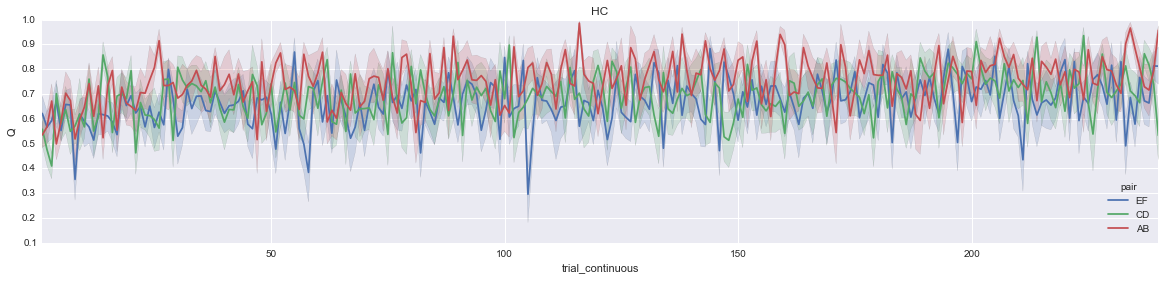

In [159]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax4 = sns.tsplot(model_HC,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)
ax4.set_title('HC')

In [160]:
model_MDD = model_train[model_train.group == 'MDD']

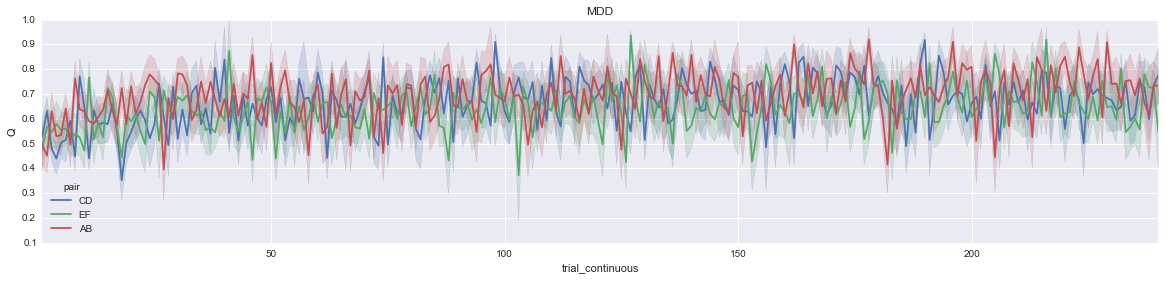

In [161]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax5 = sns.tsplot(model_MDD,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)
ax5.set_title('MDD')